In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
'''
current mkt price
curl "https://api.cryptowat.ch/markets/kraken/btceur/price"

https://api.cryptowat.ch/markets/:exchange/:pair/price
e.g.
https://api.cryptowat.ch/markets/kraken/btceur/price


'''

In [ ]:
https://api.cryptowat.ch/markets/prices

In [4]:
url = 'https://api.cryptowat.ch/markets/prices'

In [5]:
resp = requests.get(url).json()
resp

{'result': {'index:kraken-futures:cf-in-bchusd': 313.3,
  'index:kraken-futures:cf-in-ltcusd': 86.05,
  'index:kraken-futures:cf-in-xrpusd': 0.5199,
  'index:kraken-futures:cf-in-xrpxbt': 2.837e-05,
  'index:kraken-futures:cme-cf-brti': 18335,
  'index:kraken-futures:cme-cf-ethusd-rti': 590.9,
  'market:binance-us:adabtc': 8.09e-06,
  'market:binance-us:adausd': 0.1487,
  'market:binance-us:adausdt': 0.14859,
  'market:binance-us:algobusd': 0.3298,
  'market:binance-us:algousd': 0.33,
  'market:binance-us:atomusd': 5.808,
  'market:binance-us:atomusdt': 5.826,
  'market:binance-us:bandusd': 7.09,
  'market:binance-us:bandusdt': 7.0819,
  'market:binance-us:batusd': 0.2541,
  'market:binance-us:batusdt': 0.254,
  'market:binance-us:bchbtc': 0.017102,
  'market:binance-us:bchusd': 313.48,
  'market:binance-us:bchusdt': 313.42,
  'market:binance-us:bnbbtc': 0.0016431,
  'market:binance-us:bnbbusd': 30.2117,
  'market:binance-us:bnbusd': 30.175,
  'market:binance-us:bnbusdt': 30.1,
  'mark

In [6]:
url2 = 'https://api.cryptowat.ch/markets/kraken/btceur/summary'
resp2 = requests.get(url).json()
resp2

{'result': {'index:kraken-futures:cf-in-bchusd': 314.79,
  'index:kraken-futures:cf-in-ltcusd': 86.34,
  'index:kraken-futures:cf-in-xrpusd': 0.5235,
  'index:kraken-futures:cf-in-xrpxbt': 2.856e-05,
  'index:kraken-futures:cme-cf-brti': 18334,
  'index:kraken-futures:cme-cf-ethusd-rti': 591.75,
  'market:binance-us:adabtc': 8.09e-06,
  'market:binance-us:adausd': 0.1486,
  'market:binance-us:adausdt': 0.14848,
  'market:binance-us:algobusd': 0.3298,
  'market:binance-us:algousd': 0.33,
  'market:binance-us:atomusd': 5.796,
  'market:binance-us:atomusdt': 5.789,
  'market:binance-us:bandusd': 7.0495,
  'market:binance-us:bandusdt': 7.0477,
  'market:binance-us:batusd': 0.2537,
  'market:binance-us:batusdt': 0.253,
  'market:binance-us:bchbtc': 0.017152,
  'market:binance-us:bchusd': 313.48,
  'market:binance-us:bchusdt': 314.43,
  'market:binance-us:bnbbtc': 0.0016431,
  'market:binance-us:bnbbusd': 30.2117,
  'market:binance-us:bnbusd': 30.1451,
  'market:binance-us:bnbusdt': 30.11,
 

In [18]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format( #why can't i change to cad? 
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [31]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_month = (pd.Timestamp.now() - pd.offsets.Day(30))


In [32]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)
eth = get_historic_price('eth', 'bitstamp', after=last_month)

In [33]:
eth.head()

OpenPrice  HighPrice  LowPrice  ClosePrice       Volume  \
CloseTime                                                                      
2020-10-24 17:00:00     414.99     414.99    411.82      413.45   780.553049   
2020-10-24 18:00:00     413.52     414.77    413.52      414.43   329.175729   
2020-10-24 19:00:00     414.54     414.54    412.96      413.35   131.678597   
2020-10-24 20:00:00     413.46     415.00    412.24      413.77  1404.629350   
2020-10-24 21:00:00     413.83     413.99    410.59      412.07   994.975550   

                                NA  
CloseTime                           
2020-10-24 17:00:00  322445.339689  
2020-10-24 18:00:00  136378.529543  
2020-10-24 19:00:00   54478.634912  
2020-10-24 20:00:00  582406.024269  
2020-10-24 21:00:00  409965.609867

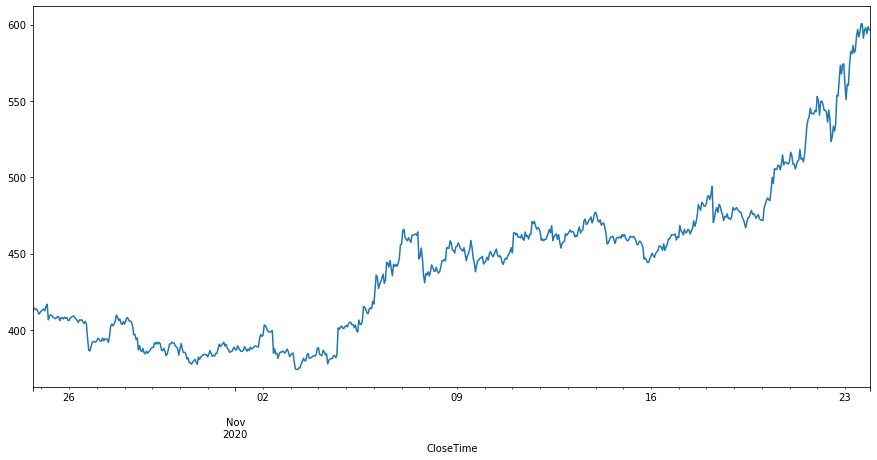

In [34]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [24]:
def historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format( #why can't i change to cad? 
        symbol=symbol, exchange=exchange)
    resp = requests.get(url).json()
    df = pd.DataFrame(resp['result']['3600'])
    return df

In [25]:
btcoin = historic_price('btc', 'bitstamp', after='2020-11-17')
btcoin

TypeError: 'method' object is not subscriptable

In [23]:
btcoin_df = pd.DataFrame(btcoin)
btcoin_df

Empty DataFrame
Columns: []
Index: []

In [ ]:

# url3 = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'



In [28]:
from pprint import pprint

In [29]:
url3 = 'https://api.cryptowat.ch/markets/bitfinex/btcusd/ohlc'
resp3 = requests.get(url3).json()
pprint(resp3)

{'allowance': {'cost': 0.015,
               'remaining': 9.785,
               'upgrade': 'For unlimited API access, create an account at '
                          'https://cryptowat.ch'},
 'result': {'14400': [[1591790400,
                       9742.4,
                       9750,
                       9730,
                       9739.1,
                       98.89356705,
                       963385.3097747453],
                      [1591804800,
                       9739.1,
                       9785.3,
                       9723.5,
                       9759.71284733,
                       237.52669848,
                       2316356.3027358693],
                      [1591819200,
                       9759.8,
                       10012,
                       9661.6,
                       9857,
                       3031.43006786,
                       29862320.67169811],
                      [1591833600,
                       9856.99387926,
                 

                       81.16515342,
                       749176.9460018773],
                      [1594497600,
                       9238,
                       9259.3,
                       9216.9,
                       9217,
                       81.94171492,
                       756358.3650355047],
                      [1594512000,
                       9217,
                       9263,
                       9215.9,
                       9246.3,
                       77.64270944,
                       716911.1493670711],
                      [1594526400,
                       9245.5,
                       9299.7,
                       9244.3,
                       9290,
                       142.14030233,
                       1318902.1665388881],
                      [1594540800,
                       9290.4,
                       9303.8,
                       9259,
                       9267.76814867,
                       95.84441485,
               

                      [1596484800,
                       11367,
                       11456,
                       11306,
                       11392,
                       796.62775967,
                       9076488.796096396],
                      [1596499200,
                       11391.06039402,
                       11405,
                       11125,
                       11226.52172839,
                       1386.21770251,
                       15605923.025488261],
                      [1596513600,
                       11226.99217374,
                       11396,
                       11225,
                       11260,
                       566.35111972,
                       6407360.248977779],
                      [1596528000,
                       11258.02441113,
                       11325,
                       11205,
                       11288.52216291,
                       265.38695124,
                       2989664.5129745496],
            

                       11734,
                       581.30509876,
                       6849591.567450198],
                      [1598025600,
                       11735,
                       11781,
                       11637,
                       11739.10739832,
                       1222.32656689,
                       14304921.015807794],
                      [1598040000,
                       11739.10739832,
                       11769,
                       11625,
                       11686,
                       1769.76610821,
                       20699476.003790587],
                      [1598054400,
                       11690,
                       11723,
                       11500,
                       11531,
                       1306.39858163,
                       15116057.491600925],
                      [1598068800,
                       11527,
                       11541,
                       11390,
                       11482.581152,

                       11847,
                       11853,
                       264.24432506,
                       3148707.6116593983],
                      [1599033600,
                       11850,
                       11926,
                       11746,
                       11746.183233,
                       562.87006793,
                       6647248.446724148],
                      [1599048000,
                       11746.183233,
                       11773,
                       11183,
                       11417,
                       2866.52664796,
                       32837480.288968205],
                      [1599062400,
                       11416,
                       11497,
                       11241,
                       11360.93834145,
                       1533.88120302,
                       17479651.714165583],
                      [1599076800,
                       11360,
                       11415.36037278,
                       

                       11069.17646505,
                       10894,
                       10894.05381289,
                       540.74634537,
                       5922841.1642484525],
                      [1600329600,
                       10894.05381289,
                       10949,
                       10866,
                       10900.360439,
                       291.48489819,
                       3178504.221915224],
                      [1600344000,
                       10900.46660301,
                       10925,
                       10810,
                       10907.0029999,
                       410.60696674,
                       4462687.463324605],
                      [1600358400,
                       10907.66323102,
                       10910,
                       10765.936272,
                       10862,
                       848.52104301,
                       9192466.623485224],
                      [1600372800,
                      

                       10270498.541298626],
                      [1601568000,
                       10925.92262784,
                       10932,
                       10719,
                       10727,
                       1434.86341837,
                       15521198.476091808],
                      [1601582400,
                       10726.11584717,
                       10726.82083022,
                       10460,
                       10627,
                       2431.54019991,
                       25700107.50771638],
                      [1601596800,
                       10626,
                       10646,
                       10580,
                       10634,
                       346.85328594,
                       3679879.3961778935],
                      [1601611200,
                       10633,
                       10666,
                       10600,
                       10664,
                       198.25903415,
                       21056

                       11392,
                       65.56800564,
                       747995.5821498582],
                      [1602748800,
                       11395,
                       11444,
                       11391,
                       11418.056175,
                       126.44767445,
                       1443507.6480255714],
                      [1602763200,
                       11419,
                       11420.994468,
                       11277,
                       11328.0056237,
                       738.15868722,
                       8373308.596102456],
                      [1602777600,
                       11328.531252,
                       11429,
                       11291.00358226,
                       11416.88558387,
                       623.75343155,
                       7106869.671962384],
                      [1602792000,
                       11417.9388129,
                       11550,
                       11381,
     

                       13258,
                       13023,
                       13159,
                       831.43881599,
                       10938746.870318266],
                      [1603929600,
                       13164.33986931,
                       13298,
                       13110,
                       13267,
                       354.20011345,
                       4680632.872744687],
                      [1603944000,
                       13266,
                       13303,
                       13180,
                       13275,
                       294.64457967,
                       3900558.0098861214],
                      [1603958400,
                       13275,
                       13314,
                       13126,
                       13136,
                       253.90484043,
                       3364272.2212478905],
                      [1603972800,
                       13134,
                       13207,
                  

                       15396,
                       15509,
                       288.46924751,
                       4466411.028565871],
                      [1604764800,
                       15510,
                       15555.405181,
                       15207,
                       15352,
                       1886.13958775,
                       28971879.93032918],
                      [1604779200,
                       15352,
                       15419,
                       14619,
                       14683,
                       7723.96610474,
                       115371574.12092865],
                      [1604793600,
                       14680,
                       14960,
                       14411,
                       14845,
                       3408.54052701,
                       50109166.62545473],
                      [1604808000,
                       14849,
                       15136,
                       14755,
                   

                      [1605686400,
                       18024,
                       18450,
                       17119,
                       18074,
                       7056.66186825,
                       125667669.43909064],
                      [1605700800,
                       18083,
                       18276,
                       17872,
                       18240.356451,
                       2403.70287134,
                       43507103.28742271],
                      [1605715200,
                       18240,
                       18240.96887232,
                       17319,
                       17876,
                       3780.82758372,
                       66934435.21750996],
                      [1605729600,
                       17878,
                       17985,
                       17562,
                       17655,
                       1448.01470466,
                       25782775.877392765],
                      [1605744000,
   

                     18630,
                     4.94684573,
                     92171.93226307713],
                    [1605988980,
                     18628,
                     18629,
                     18583,
                     18583,
                     2.38387169,
                     44360.78606460308],
                    [1605989160,
                     18583,
                     18600,
                     18556,
                     18567,
                     15.04204826,
                     279561.1380920423],
                    [1605989340,
                     18567,
                     18593,
                     18555,
                     18568,
                     3.77722127,
                     70161.64798640154],
                    [1605989520,
                     18568.68969857,
                     18577,
                     18544,
                     18564,
                     12.58392444,
                     233521.6648738045],
           

                     215105.30551757626],
                    [1606004820,
                     18702,
                     18702,
                     18653,
                     18653,
                     7.10890918,
                     132798.85649329372],
                    [1606005000,
                     18653,
                     18665,
                     18637,
                     18659,
                     1.31809724,
                     24592.505131003258],
                    [1606005180,
                     18659,
                     18660,
                     18640,
                     18640,
                     1.31476512,
                     24522.353127561088],
                    [1606005360,
                     18640,
                     18669.00224,
                     18640,
                     18669.00224,
                     3.5663977,
                     66526.19417792597],
                    [1606005540,
                     18665,
       

                    [1606012020,
                     18454,
                     18471,
                     18439,
                     18455,
                     0.86787813,
                     16018.61207936715],
                    [1606012200,
                     18456,
                     18464,
                     18438,
                     18453.68025468,
                     0.96046439,
                     17719.889094283095],
                    [1606012380,
                     18459,
                     18475,
                     18459,
                     18463,
                     1.22276513,
                     22583.295498615946],
                    [1606012560,
                     18462,
                     18475,
                     18442,
                     18475,
                     0.50558868,
                     9334.54263626892],
                    [1606012740,
                     18475,
                     18520,
                     1847

                     50296.52204734808],
                    [1606021560,
                     18517,
                     18522,
                     18512,
                     18519,
                     0.46274745,
                     8568.939786382614],
                    [1606021740,
                     18513,
                     18514,
                     18497,
                     18505,
                     3.16507905,
                     58574.74115523663],
                    [1606021920,
                     18504.66382259,
                     18505,
                     18504,
                     18504,
                     0.24582325,
                     4548.812456659295],
                    [1606022100,
                     18504.66382259,
                     18504.66382259,
                     18494,
                     18496,
                     1.85540357,
                     34322.19861431546],
                    [1606022280,
                     18

                     18258,
                     18286,
                     18256,
                     18263,
                     3.6064021,
                     65879.17099226997],
                    [1606040280,
                     18262.693888,
                     18285,
                     18250.93164741,
                     18285,
                     2.38127407,
                     43480.84470071098],
                    [1606040460,
                     18285,
                     18285,
                     18242,
                     18242,
                     6.96387254,
                     127146.88142449],
                    [1606040640,
                     18242,
                     18274,
                     18227,
                     18274,
                     6.03723628,
                     110133.25896710536],
                    [1606040820,
                     18274.24768,
                     18285,
                     18261.41250825,
           

                     384166.23519127956],
                    [1606054500,
                     18190,
                     18255.67430489,
                     18190,
                     18252,
                     14.15035416,
                     257769.74830103098],
                    [1606054680,
                     18248,
                     18258,
                     18218.89776105,
                     18243.81766119,
                     1.85672674,
                     33871.30896549316],
                    [1606054860,
                     18244.400384,
                     18287,
                     18244.400384,
                     18276,
                     5.47590752,
                     100032.64502441045],
                    [1606055040,
                     18274,
                     18275,
                     18234,
                     18234.84079125,
                     21.32817099,
                     389413.6609683929],
                    [1606055

                    [1606068360,
                     18500,
                     18514,
                     18491.2578603,
                     18513,
                     3.39052334,
                     62736.42129937436],
                    [1606068540,
                     18513,
                     18532,
                     18506.286336,
                     18530,
                     7.08478136,
                     131200.83216571325],
                    [1606068720,
                     18525,
                     18541,
                     18518,
                     18518,
                     36.73307573,
                     680576.1594689405],
                    [1606068900,
                     18518,
                     18550,
                     18504,
                     18533,
                     123.69135777,
                     2292247.780320252],
                    [1606069080,
                     18532.282368,
                     18559,
         

                    [1606086180,
                     18597,
                     18602,
                     18556.6154995,
                     18580,
                     9.73351102,
                     180909.85116985935],
                    [1606086360,
                     18580,
                     18580,
                     18524.1825356,
                     18553,
                     72.24922634,
                     1339223.5426324664],
                    [1606086540,
                     18556,
                     18556.09785368,
                     18522,
                     18522.22943883,
                     14.05713198,
                     260549.1749967608],
                    [1606086720,
                     18522.22943883,
                     18548,
                     18505,
                     18505,
                     94.70011412,
                     1753544.680418827],
                    [1606086900,
                     18505,
               

                     18229,
                     18202.3488339,
                     18229,
                     1.04856448,
                     19103.326335702463],
                    [1606099320,
                     18226,
                     18226,
                     18205,
                     18206,
                     0.27794505,
                     5060.372074554444],
                    [1606099500,
                     18206,
                     18214,
                     18175.03937381,
                     18190,
                     3.89317297,
                     70839.66360770215],
                    [1606099680,
                     18194,
                     18229,
                     18175,
                     18175,
                     4.54308949,
                     82673.25160358119],
                    [1606099860,
                     18175,
                     18210,
                     18175,
                     18186,
                     4

                    [1606115880,
                     18463.4382035,
                     18479,
                     18443,
                     18479,
                     25.68413823,
                     474062.4403835044],
                    [1606116060,
                     18479,
                     18488,
                     18461,
                     18462,
                     10.64847943,
                     196802.59586007494],
                    [1606116240,
                     18470,
                     18488,
                     18470,
                     18486,
                     3.02660559,
                     55951.63032374203],
                    [1606116420,
                     18482,
                     18484,
                     18470.56235972,
                     18473,
                     1.59081453,
                     29394.089540336718],
                    [1606116600,
                     18473,
                     18488,
              

                     18688,
                     18721,
                     18687,
                     18720.71544066,
                     29.97657318,
                     560789.1987083342],
                    [1606128660,
                     18720,
                     18724,
                     18716,
                     18717,
                     56.96064133,
                     1066402.741369685],
                    [1606128840,
                     18718,
                     18718,
                     18681,
                     18686,
                     27.5383376,
                     514930.3891788689],
                    [1606129020,
                     18686.27179469,
                     18687,
                     18678,
                     18680,
                     14.75740966,
                     275695.75457968924],
                    [1606129200,
                     18680,
                     18718,
                     18679,
                  

                     18504.182423,
                     18547,
                     20.61188666,
                     382206.6024113884],
                    [1606141260,
                     18547,
                     18553.66340674,
                     18516,
                     18519,
                     13.25118685,
                     245686.45548656356],
                    [1606141440,
                     18519,
                     18540,
                     18511,
                     18540,
                     5.20473693,
                     96452.23737396042],
                    [1606141620,
                     18539,
                     18583,
                     18537,
                     18557,
                     31.22592422,
                     579937.3022773034],
                    [1606141800,
                     18555,
                     18555,
                     18516,
                     18544,
                     5.03093122,
               

                    [1606150080,
                     18176,
                     18275,
                     18175,
                     18275,
                     25.5957659,
                     466891.75714406115],
                    [1606150260,
                     18275,
                     18311.7490165,
                     18264,
                     18308,
                     21.80410116,
                     398666.35321310785],
                    [1606150440,
                     18301,
                     18311.7490165,
                     18280,
                     18311,
                     16.9664311,
                     310503.7545605895],
                    [1606150620,
                     18311,
                     18355,
                     18311,
                     18354.2705571,
                     7.20399472,
                     132023.5664010421],
                    [1606150800,
                     18351.986283,
                     18385,
 

                     18366,
                     18380,
                     3.99291576,
                     73386.97078436278],
                    [1606160160,
                     18380,
                     18399.98398464,
                     18380,
                     18399.98398464,
                     2.68511497,
                     49365.55211848451],
                    [1606160340,
                     18399,
                     18399.02547285,
                     18387,
                     18387,
                     11.15770949,
                     205279.04263491655],
                    [1606160520,
                     18387,
                     18453,
                     18366,
                     18453,
                     26.42911564,
                     485936.17202516034],
                    [1606160700,
                     18452,
                     18453.47797055,
                     18433,
                     18436,
                     22.9301

                      13769.52024534,
                      13732,
                      13753.01089491,
                      25.26758414,
                      347413.8599540595],
                     [1604433600,
                      13753.01089491,
                      13758,
                      13713,
                      13717.822255,
                      28.18920793,
                      387341.2571487908],
                     [1604435400,
                      13719,
                      13742,
                      13684,
                      13732,
                      52.08511949,
                      714639.0116738805],
                     [1604437200,
                      13732,
                      13767,
                      13729.35856899,
                      13730,
                      22.00741597,
                      302592.51311497035],
                     [1604439000,
                      13733.7769977,
                      13772.056032,
    

                      15634,
                      321.8518787,
                      5025970.657753682],
                     [1604633400,
                      15635,
                      15673,
                      15453,
                      15591,
                      717.43986959,
                      11174373.177680375],
                     [1604635200,
                      15583.40220619,
                      15625,
                      15409,
                      15416.42325696,
                      827.10874436,
                      12846218.935547858],
                     [1604637000,
                      15416.42325696,
                      15542,
                      15408,
                      15527.3665344,
                      183.83559626,
                      2846336.293669128],
                     [1604638800,
                      15528,
                      15573,
                      15430.4165568,
                      15533,
               

                     [1604844000,
                      15175,
                      15226,
                      15134,
                      15218.17349616,
                      90.04953513,
                      1365890.347455843],
                     [1604845800,
                      15218,
                      15263,
                      15204,
                      15260,
                      24.57184878,
                      374278.814088096],
                     [1604847600,
                      15260,
                      15343,
                      15250,
                      15342,
                      343.75981114,
                      5264115.5509624155],
                     [1604849400,
                      15342,
                      15430,
                      15342,
                      15361,
                      391.06541782,
                      6018692.687171006],
                     [1604851200,
                      15366,
                  

                     [1605025800,
                      15169.85950908,
                      15246,
                      15109,
                      15241.838664,
                      131.2521486,
                      1993139.5855374588],
                     [1605027600,
                      15246,
                      15286,
                      15234,
                      15247.8019141,
                      48.63577975,
                      741866.7263913262],
                     [1605029400,
                      15241,
                      15294.87731815,
                      15241,
                      15273,
                      24.63975362,
                      376396.14795404184],
                     [1605031200,
                      15274,
                      15328.43696454,
                      15249,
                      15317,
                      27.72171967,
                      424082.9893790075],
                     [1605033000,
              

                      15754,
                      15778,
                      45.06956385,
                      710928.3386255744],
                     [1605162600,
                      15777,
                      15860,
                      15761.62130972,
                      15842,
                      92.3494879,
                      1461179.7328893617],
                     [1605164400,
                      15842,
                      15875,
                      15801,
                      15819,
                      31.23067885,
                      494935.78572250344],
                     [1605166200,
                      15819.67512771,
                      15887,
                      15800,
                      15863,
                      52.4171097,
                      830791.5666227053],
                     [1605168000,
                      15863.32806872,
                      15949,
                      15829,
                      15888.04738149

                      16188,
                      53.85113669,
                      872365.0670131714],
                     [1605321000,
                      16189,
                      16212,
                      16168,
                      16207,
                      127.92047015,
                      2070362.9962212883],
                     [1605322800,
                      16207,
                      16225,
                      16156,
                      16170,
                      36.72893495,
                      594497.8257090662],
                     [1605324600,
                      16169.5207476,
                      16188,
                      16120,
                      16181.3561456,
                      44.32625753,
                      715620.4354246996],
                     [1605326400,
                      16179.7053214,
                      16179.7053214,
                      16127,
                      16178,
                      19.5719

                      15861,
                      36.10160373,
                      571714.7198189913],
                     [1605475800,
                      15861,
                      15905,
                      15834,
                      15880,
                      48.77690035,
                      773960.9480681357],
                     [1605477600,
                      15880,
                      15890,
                      15848,
                      15848,
                      18.95159617,
                      300712.55024903157],
                     [1605479400,
                      15850,
                      15850,
                      15794,
                      15846,
                      145.90907783,
                      2307869.427307684],
                     [1605481200,
                      15846,
                      15975,
                      15846,
                      15933,
                      55.64783974,
                      8857

                      16592,
                      89.52615787,
                      1485718.6140328357],
                     [1605585600,
                      16591,
                      16624,
                      16566,
                      16567,
                      17.67238347,
                      293409.4607852271],
                     [1605587400,
                      16567,
                      16649,
                      16535,
                      16628,
                      68.76468892,
                      1139722.4242272289],
                     [1605589200,
                      16626,
                      16667,
                      16618.54426615,
                      16659.06365715,
                      30.77083941,
                      512049.20717976365],
                     [1605591000,
                      16658,
                      16658,
                      16610,
                      16615,
                      19.92585493,
       

                      2631915.8025786006],
                     [1605708000,
                      17988,
                      18084,
                      17795,
                      17878.97092088,
                      459.32264752,
                      8225222.851677117],
                     [1605709800,
                      17880.75151328,
                      17960,
                      17777,
                      17869,
                      188.94251047,
                      3376572.610149612],
                     [1605711600,
                      17869,
                      17884,
                      17666,
                      17699,
                      525.90998481,
                      9346224.42083826],
                     [1605713400,
                      17691,
                      17729.23845711,
                      17319,
                      17581,
                      1588.62331964,
                      27748741.14158153],
                  

                      17818,
                      53.53292651,
                      953334.3863572646],
                     [1605832200,
                      17813,
                      17934,
                      17797,
                      17881,
                      46.23544572,
                      826570.0794217106],
                     [1605834000,
                      17881,
                      17881,
                      17768,
                      17787,
                      49.97927606,
                      890242.7859224068],
                     [1605835800,
                      17788,
                      17887.84956752,
                      17753,
                      17887.84956752,
                      28.92442028,
                      515368.80237720214],
                     [1605837600,
                      17887,
                      17968,
                      17878,
                      17968,
                      42.59765905,
         

                     [1605969000,
                      18791.59460013,
                      18802,
                      18627.97291707,
                      18663,
                      81.01338335,
                      1515316.109270077],
                     [1605970800,
                      18663.9740208,
                      18753,
                      18626,
                      18724,
                      97.53521015,
                      1824782.6613070918],
                     [1605972600,
                      18721,
                      18801.07991509,
                      18631.52991018,
                      18778,
                      99.71270913,
                      1865776.3124585326],
                     [1605974400,
                      18781,
                      18784,
                      18725,
                      18777,
                      61.88139942,
                      1160631.331803685],
                     [1605976200,
            

                      67.31533994,
                      1248073.64812254],
                     [1606077000,
                      18546,
                      18634,
                      18546,
                      18591,
                      221.62662932,
                      4123938.8956229826],
                     [1606078800,
                      18591,
                      18611,
                      18485,
                      18540,
                      99.84130475,
                      1851069.2814733917],
                     [1606080600,
                      18539,
                      18580,
                      18471,
                      18574,
                      59.34440193,
                      1098801.6179342696],
                     [1606082400,
                      18573,
                      18593.09889982,
                      18540,
                      18549.724572,
                      21.77134508,
                      404386.923451295

                      [1584943200,
                       5820,
                       5988,
                       5677,
                       5886.9,
                       3055.21552991,
                       17917131.629325062],
                      [1584964800,
                       5886.8,
                       5982.05554338,
                       5749.1,
                       5856.9,
                       2726.22684953,
                       16043742.1862898],
                      [1584986400,
                       5856.9,
                       6664.3,
                       5856.8744323,
                       6292,
                       10622.78365058,
                       66794480.35934682],
                      [1585008000,
                       6292.6,
                       6531,
                       6246.1131337,
                       6491.5,
                       3112.18691205,
                       19961396.24315907],
                      [1585029

                       8874443.534769267],
                      [1585980000,
                       6742,
                       6815,
                       6684,
                       6749.3,
                       1017.61392013,
                       6874473.190516296],
                      [1586001600,
                       6749.3,
                       6928,
                       6660,
                       6712.3,
                       2220.9911495,
                       15109919.876045814],
                      [1586023200,
                       6710.9,
                       6819.1,
                       6682.56439179,
                       6796.66512421,
                       1008.74540447,
                       6824446.707403374],
                      [1586044800,
                       6796.66512421,
                       7014,
                       6735.7249603,
                       6880.1,
                       2876.9615758,
                       197

                       8406163.942425217],
                      [1587146400,
                       7095.051408,
                       7118,
                       7010.2,
                       7055.6,
                       1336.65814733,
                       9436308.344156977],
                      [1587168000,
                       7055.6,
                       7159.5,
                       7030.26207155,
                       7045.8,
                       1170.73254623,
                       8291926.007181502],
                      [1587189600,
                       7045.8054993,
                       7133,
                       7031.1,
                       7116.7,
                       536.77054781,
                       3808356.0316050835],
                      [1587211200,
                       7116.6,
                       7135.1980215,
                       7070.8,
                       7123.6,
                       524.74074175,
                     

                      [1588269600,
                       8839.8,
                       8933.3,
                       8416,
                       8566.6,
                       5749.88498695,
                       50150006.90938359],
                      [1588291200,
                       8561.37698029,
                       8887.3,
                       8560.39214673,
                       8631.81715292,
                       3484.78146969,
                       30376215.357554086],
                      [1588312800,
                       8630.7,
                       8839,
                       8626.5,
                       8812.90414424,
                       1018.81228045,
                       8896921.790611796],
                      [1588334400,
                       8804.2,
                       9070,
                       8708.5,
                       9009.7,
                       2618.53403791,
                       23344634.63669041],
                 

                       1808.75788162,
                       17657957.85125121],
                      [1591315200,
                       9828.1,
                       9882.1,
                       9726.3,
                       9790.700076,
                       873.50138166,
                       8567403.857535543],
                      [1591336800,
                       9790.700076,
                       9848.9,
                       9755.6,
                       9788.7,
                       362.65553459,
                       3556265.096316395],
                      [1591358400,
                       9788.7,
                       9865.8,
                       9625.35925038,
                       9699.10621681,
                       2095.93339113,
                       20386404.963334087],
                      [1591380000,
                       9699.8,
                       9752.6,
                       9637.5,
                       9725.151492,
            

                       9470.08782609,
                       619.8420251,
                       5855199.945919979],
                      [1592848800,
                       9470.1,
                       9640,
                       9451.5,
                       9600,
                       2676.84283027,
                       25490705.655481413],
                      [1592870400,
                       9599.6,
                       9795,
                       9558.012285,
                       9697.72816498,
                       1847.55269013,
                       17868815.96100089],
                      [1592892000,
                       9697.72816498,
                       9724,
                       9624.6,
                       9635.4,
                       387.03508121,
                       3741338.3153533903],
                      [1592913600,
                       9636.9,
                       9675,
                       9589.7,
                       96

                       26281548.024615888],
                      [1595376000,
                       9388.1,
                       9414.1,
                       9375.6,
                       9402,
                       270.29764406,
                       2539836.7854497675],
                      [1595397600,
                       9402.1,
                       9403.07891079,
                       9356.7,
                       9367.99417043,
                       155.30691168,
                       1457654.9946640558],
                      [1595419200,
                       9365.7,
                       9376.9,
                       9305,
                       9374.8,
                       577.77574702,
                       5396371.9888000805],
                      [1595440800,
                       9374.8,
                       9386.6,
                       9342.1121303,
                       9379.4,
                       343.7392046,
                       32

                      [1596650400,
                       11439,
                       11701,
                       11389.91851534,
                       11668,
                       2175.81133608,
                       25195218.95678222],
                      [1596672000,
                       11666.91388325,
                       11800,
                       11524,
                       11735.81391634,
                       2095.94052098,
                       24529762.73470049],
                      [1596693600,
                       11735.93261188,
                       11799,
                       11557,
                       11627,
                       612.64347048,
                       7142364.446081161],
                      [1596715200,
                       11626,
                       11749.06930875,
                       11624,
                       11690.07040649,
                       501.0902944,
                       5854592.251079577],
     

                       11331,
                       11609,
                       11145,
                       11206,
                       3148.85988753,
                       35813114.06010214],
                      [1598572800,
                       11206,
                       11359,
                       11180,
                       11343,
                       670.09287286,
                       7565967.153450914],
                      [1598594400,
                       11343,
                       11420,
                       11303,
                       11420,
                       323.89185838,
                       3686603.8478013594],
                      [1598616000,
                       11418.97147526,
                       11489,
                       11381,
                       11487,
                       729.28314684,
                       8339596.0636431575],
                      [1598637600,
                       11489,
                  

                       11102,
                       10888,
                       11063,
                       1790.48510336,
                       19721540.472922076],
                      [1600300800,
                       11063,
                       11104.97665904,
                       10966,
                       10971.25116264,
                       627.67184134,
                       6926904.699377033],
                      [1600322400,
                       10971.45422468,
                       11069.17646505,
                       10871,
                       10935,
                       694.93785374,
                       7605308.196851807],
                      [1600344000,
                       10934,
                       10944.9240285,
                       10810,
                       10907.0029999,
                       547.90035656,
                       5958724.652636474],
                      [1600365600,
                       10907.6632310

                      [1601726400,
                       10555.93347075,
                       10578,
                       10513,
                       10556,
                       231.16797724,
                       2437148.1500742384],
                      [1601748000,
                       10556.06280573,
                       10616,
                       10541,
                       10602.8820703,
                       234.77391833,
                       2482507.496597695],
                      [1601769600,
                       10602.10606039,
                       10613,
                       10547,
                       10558.58697865,
                       239.47328036,
                       2534416.664263236],
                      [1601791200,
                       10558.00112605,
                       10595,
                       10541,
                       10587.05941476,
                       269.1543401,
                       2846709.5815919954

                      [1603152000,
                       11742.28305672,
                       11788,
                       11679.016276,
                       11757,
                       531.98714114,
                       6238463.798927074],
                      [1603173600,
                       11757,
                       11773,
                       11696,
                       11768,
                       348.78507898,
                       4093285.600349164],
                      [1603195200,
                       11767,
                       11930,
                       11699,
                       11775,
                       1687.85333435,
                       19930372.35916525],
                      [1603216800,
                       11775,
                       12044,
                       11770,
                       11984,
                       2272.02418924,
                       27152826.671197467],
                      [1603238400,
      

                       27796400.228619695],
                      [1604469600,
                       14029.5896356,
                       14051.92413104,
                       13710,
                       13798.556316,
                       2656.03500904,
                       36838288.87999662],
                      [1604491200,
                       13800,
                       13839,
                       13530,
                       13719,
                       1987.89411808,
                       27189845.079827294],
                      [1604512800,
                       13719.451648,
                       14244,
                       13709,
                       14069.2450487,
                       4281.17177548,
                       60098093.635372125],
                      [1604534400,
                       14069,
                       14245,
                       13934,
                       14149,
                       1173.23486386,
              

                       15770,
                       16183,
                       15755,
                       15964,
                       3108.16619316,
                       49805036.69672233],
                      [1605225600,
                       15950,
                       16325,
                       15889,
                       16296.18794388,
                       3055.0592069,
                       49465212.453622736],
                      [1605247200,
                       16296,
                       16481,
                       16203,
                       16245.80731125,
                       2900.01357629,
                       47517713.89330348],
                      [1605268800,
                       16245,
                       16361,
                       16011,
                       16213,
                       1471.20332924,
                       23823973.298810687],
                      [1605290400,
                       16212,
       

                        0.0],
                       [1390608000, 824.89, 826.5, 767.23, 778, 16796.27, 0.0],
                       [1390867200,
                        778.13,
                        836.7318,
                        726.5,
                        750.0,
                        28126.845804,
                        0.0],
                       [1391126400,
                        748.123,
                        814.5,
                        741.214,
                        801.5,
                        25667.39,
                        0.0],
                       [1391385600, 799.5, 829, 793, 814.222, 11598.542, 0.0],
                       [1391644800,
                        814.222,
                        815.2,
                        777.85,
                        778.03,
                        12025.608,
                        0.0],
                       [1391904000, 782, 829, 620, 680.49, 75025.2, 0.0],
                       [1392163200,
            

                        342.54,
                        321.0,
                        338.62,
                        61005.129967,
                        0.0],
                       [1415491200, 338.62, 354.32, 336.32, 345, 51033.37, 0.0],
                       [1415750400,
                        345.01,
                        374.26,
                        343.41,
                        367.65,
                        80251.59,
                        0.0],
                       [1416009600,
                        367.66,
                        475,
                        367.59,
                        399.99,
                        307899.38,
                        0.0],
                       [1416268800, 400, 413.48, 368, 387.5, 115784.64, 0.0],
                       [1416528000, 387.5, 393, 352.01, 356.77, 76213.23, 0.0],
                       [1416787200,
                        356.59,
                        372.28,
                        340,
               

                        275.55,
                        33418.676306,
                        0.0],
                       [1437782400,
                        275.55,
                        289.93,
                        274.5,
                        288.6,
                        40670.816,
                        0.0],
                       [1438041600,
                        288.58,
                        298.74,
                        286.0,
                        294.84,
                        46387.811826,
                        0.0],
                       [1438300800,
                        294.73,
                        298.93,
                        284.01,
                        288.21,
                        42060.38,
                        0.0],
                       [1438560000,
                        288.02,
                        289.85,
                        276.26,
                        282.44,
                        38141.69,
                

                        415.91,
                        31972.016,
                        0.0],
                       [1458259200,
                        415.99,
                        420.6,
                        412.78,
                        418.75,
                        24065.03,
                        0.0],
                       [1458518400,
                        418.71,
                        418.86,
                        403.01,
                        411.25,
                        34033.91,
                        0.0],
                       [1458777600,
                        410.81,
                        419.72,
                        406,
                        418.12,
                        24108.533,
                        0.0],
                       [1459036800,
                        418.12,
                        419.4,
                        413.03,
                        416.71,
                        15166.966,
                        

                        700.02,
                        724.54,
                        28341.555,
                        0.0],
                       [1478995200, 723.37, 725, 700.1, 703.57, 15285.703, 0.0],
                       [1479254400,
                        703.56,
                        720.05,
                        687.6,
                        712.17,
                        22625.582,
                        0.0],
                       [1479513600, 712, 763.85, 710, 753.97, 38149.32, 0.0],
                       [1479772800,
                        753.91,
                        759.99,
                        711.2,
                        738.99,
                        25894.06,
                        0.0],
                       [1480032000, 739, 753.91, 727.61, 737.61, 21084.27, 0.0],
                       [1480291200, 737.67, 741.12, 720, 724.9, 12044.706, 0.0],
                       [1480550400,
                        724.99,
                        743

                        10148,
                        10500,
                        9280.4,
                        10320,
                        131906.2,
                        1298098700.0],
                       [1519948800,
                        10321,
                        11095,
                        10125,
                        10921,
                        116979.65,
                        1245435400.0],
                       [1520208000,
                        10921,
                        11549,
                        10762,
                        11500,
                        87440.24,
                        980053560.0],
                       [1520467200,
                        11500,
                        11700,
                        9400,
                        9902.9,
                        146916.69,
                        1561351700.0],
                       [1520726400,
                        9902.5,
                        10112,
   

                        3893.9,
                        69244.09024528,
                        269784333.2605861],
                       [1546387200,
                        3893.9,
                        4003.8,
                        3771,
                        3963.1,
                        47324.91654285,
                        184406088.22605065],
                       [1546646400,
                        3963.1,
                        4083.4707,
                        3850.1,
                        3954.9,
                        43185.64761128,
                        171009736.77105755],
                       [1546905600,
                        3954.9,
                        4218,
                        3887.5,
                        4113.9,
                        51340.38243953,
                        208070302.73228213],
                       [1547164800,
                        4113.9,
                        4215.8,
                        3687.2,
      

                        11824,
                        32813.22528109,
                        367786434.35905886],
                       [1565308800,
                        11830,
                        12325,
                        11249,
                        12050,
                        43954.13314289,
                        519427615.2756116],
                       [1565568000,
                        12050,
                        12097,
                        11129,
                        11565.357744,
                        22324.95728956,
                        259146393.7106324],
                       [1565827200,
                        11577,
                        11585,
                        9966,
                        10064.558229,
                        26712.86034265,
                        287440632.5250162],
                       [1566086400,
                        10067,
                        10568,
                        9522,
           

                        8902,
                        14793.12234713,
                        132505474.3040905],
                       [1590710400,
                        8901.1,
                        9630.3,
                        8704.9,
                        9589.3,
                        17016.8747118,
                        155794917.9516065],
                       [1590969600,
                        9587.5,
                        9750,
                        9323.3,
                        9451.1,
                        13723.95394561,
                        130567295.83683906],
                       [1591228800,
                        9451.1,
                        10398,
                        9150,
                        9676.6,
                        37570.49407813,
                        369224396.6998028],
                       [1591488000,
                        9677.6,
                        9882.1,
                        9461.00275433,
        

            '300': [[1605865500,
                     18160,
                     18171.92245284,
                     18144,
                     18144.01762984,
                     10.24009032,
                     185929.9587639578],
                    [1605865800,
                     18144.01762984,
                     18165,
                     18105,
                     18165,
                     11.08893051,
                     200999.7419765391],
                    [1605866100,
                     18165,
                     18178,
                     18165,
                     18165,
                     6.26305901,
                     113825.18453175783],
                    [1605866400,
                     18165,
                     18196.3637436,
                     18159.9590716,
                     18185,
                     8.47428642,
                     154042.63942612492],
                    [1605866700,
                     18184,
                

                     18660.210825,
                     18667.74119816,
                     62.02004828,
                     1158451.649386707],
                    [1605888300,
                     18667.74119816,
                     18726,
                     18631,
                     18706.20198153,
                     82.93941976,
                     1549438.0084745241],
                    [1605888600,
                     18707,
                     18800,
                     18700,
                     18762,
                     112.32929791,
                     2108620.8279301804],
                    [1605888900,
                     18767,
                     18810,
                     18753,
                     18800,
                     42.99713564,
                     807773.0546047803],
                    [1605889200,
                     18801,
                     18801,
                     18715,
                     18746,
                     80.665

                     262521.8183516123],
                    [1605910500,
                     18499,
                     18541,
                     18498,
                     18515,
                     12.88891516,
                     238725.54569278142],
                    [1605910800,
                     18514,
                     18534,
                     18498,
                     18534,
                     9.89068087,
                     183083.97652410166],
                    [1605911100,
                     18534.437566,
                     18540,
                     18525,
                     18540,
                     2.59301815,
                     48051.90840944537],
                    [1605911400,
                     18540,
                     18550,
                     18532,
                     18532,
                     3.1579662,
                     58565.65286200253],
                    [1605911700,
                     18531.87682081,
    

                     18590,
                     18594,
                     5.56162479,
                     103489.27356757337],
                    [1605934500,
                     18594,
                     18604.25962967,
                     18572,
                     18588,
                     6.4532503,
                     119975.62804205556],
                    [1605934800,
                     18588,
                     18589,
                     18541,
                     18560.39004798,
                     8.34735052,
                     154882.74368619616],
                    [1605935100,
                     18559,
                     18592,
                     18549.71906865,
                     18588,
                     3.32166432,
                     61685.468522470655],
                    [1605935400,
                     18585,
                     18598.716672,
                     18546,
                     18551,
                     1.65695507

                    [1605948300,
                     18704,
                     18722,
                     18704,
                     18710,
                     8.38892366,
                     157006.55263161554],
                    [1605948600,
                     18710,
                     18736,
                     18710,
                     18736,
                     6.59092871,
                     123473.81024740446],
                    [1605948900,
                     18736,
                     18755,
                     18730,
                     18755,
                     7.02653878,
                     131718.20573408034],
                    [1605949200,
                     18754,
                     18770,
                     18754,
                     18766,
                     8.7739637,
                     164599.12364031287],
                    [1605949500,
                     18766.69564836,
                     18772,
                     18

                    [1605969600,
                     18683,
                     18702,
                     18682,
                     18697,
                     13.01406906,
                     243285.9726746311],
                    [1605969900,
                     18697,
                     18712,
                     18691.99879305,
                     18700.29844364,
                     28.00005001,
                     523637.8841665644],
                    [1605970200,
                     18700,
                     18747,
                     18700,
                     18742.98236096,
                     21.15884116,
                     396028.94443737663],
                    [1605970500,
                     18742,
                     18753,
                     18711.8031114,
                     18714.4602831,
                     12.36771144,
                     231770.30178733604],
                    [1605970800,
                     18715,
              

                     1.4579538,
                     26923.486028236937],
                    [1606012800,
                     18465,
                     18555,
                     18465,
                     18531,
                     14.6546899,
                     271348.7900837056],
                    [1606013100,
                     18528,
                     18557,
                     18528,
                     18544,
                     9.02500182,
                     167399.11317001138],
                    [1606013400,
                     18541,
                     18561,
                     18511.100416,
                     18557,
                     5.95459528,
                     110406.61390285187],
                    [1606013700,
                     18560,
                     18562,
                     18532,
                     18552,
                     5.14544039,
                     95446.37597918476],
                    [1606014000,
        

                     6.03024507,
                     109966.7996046776],
                    [1606058400,
                     18228,
                     18241,
                     18224.84703127,
                     18228.40402438,
                     22.43749887,
                     409068.8627965426],
                    [1606058700,
                     18238,
                     18241,
                     18217,
                     18217,
                     2.88311335,
                     52579.45524948931],
                    [1606059000,
                     18217,
                     18220,
                     18204,
                     18210.61904722,
                     4.05292864,
                     73815.98531344764],
                    [1606059300,
                     18213,
                     18228,
                     18205,
                     18228,
                     3.1086637,
                     56622.82522585259],
                    [16

                    [1606095300,
                     18089,
                     18165.7529216,
                     18049.77185445,
                     18115,
                     27.21289031,
                     492839.5208980239],
                    [1606095600,
                     18114,
                     18127,
                     18050,
                     18073,
                     7.37656573,
                     133448.10358405876],
                    [1606095900,
                     18073.942255,
                     18191,
                     18073.942255,
                     18167,
                     11.24884945,
                     204126.0151273675],
                    [1606096200,
                     18163,
                     18222,
                     18141.1200304,
                     18213,
                     37.0826531,
                     674576.5183087175],
                    [1606096500,
                     18213,
                     

                     35.91138885,
                     666931.5108630619],
                    [1606131000,
                     18581.78298276,
                     18602,
                     18545,
                     18600,
                     52.23104278,
                     970328.3356505217],
                    [1606131300,
                     18593,
                     18630,
                     18577,
                     18630,
                     60.90818496,
                     1133907.447281931],
                    [1606131600,
                     18630,
                     18635,
                     18608.84550153,
                     18613,
                     39.42469866,
                     734221.2672158941],
                    [1606131900,
                     18613,
                     18635,
                     18613,
                     18620,
                     37.53308775,
                     699011.6510330866],
                    [160613

                     661384.9988755432],
                    [1606145700,
                     18345,
                     18345,
                     18255,
                     18302,
                     109.61446809,
                     2003659.7682249036],
                    [1606146000,
                     18302,
                     18367.6054247,
                     18302,
                     18347,
                     21.47945671,
                     393832.2044243201],
                    [1606146300,
                     18347.543227,
                     18376.070979,
                     18343,
                     18344,
                     39.82543894,
                     731065.5938942225],
                    [1606146600,
                     18343,
                     18343,
                     18221,
                     18288,
                     88.0502909,
                     1608894.9799806469],
                    [1606146900,
                     1

                     100903.63279931645],
                    [1606156800,
                     18357,
                     18366,
                     18355,
                     18355.10862671,
                     12.06988679,
                     221607.12458339726],
                    [1606157100,
                     18355,
                     18407,
                     18349,
                     18400,
                     10.5013514,
                     192806.91895889334],
                    [1606157400,
                     18400,
                     18400,
                     18358.036992,
                     18358.036992,
                     21.08618335,
                     387601.6513825001],
                    [1606157700,
                     18358.036992,
                     18385,
                     18332,
                     18336,
                     21.60671586,
                     396707.6835516997],
                    [1606158000,
              

                     [1602860400,
                      11367,
                      11395,
                      11328.47744574,
                      11335,
                      132.85442933,
                      1507251.5988258878],
                     [1602864000,
                      11334,
                      11346,
                      11300,
                      11337,
                      191.47527329,
                      2168421.185119263],
                     [1602867600,
                      11338,
                      11360,
                      11319,
                      11358,
                      80.97173674,
                      918753.1937327011],
                     [1602871200,
                      11359,
                      11360,
                      11337,
                      11345,
                      42.35814962,
                      480714.23329243436],
                     [1602874800,
                      11346,
                

                      613115.5690735653],
                     [1603238400,
                      11960,
                      11966,
                      11905,
                      11925,
                      59.05939808,
                      705169.4505896446],
                     [1603242000,
                      11924.12565284,
                      12002.402988,
                      11910,
                      12002.15834496,
                      144.97657216,
                      1735321.4144927324],
                     [1603245600,
                      12001.8919959,
                      12050,
                      11989,
                      12010,
                      265.58447206,
                      3194819.531163646],
                     [1603249200,
                      12010,
                      12140,
                      11996,
                      12137.26235,
                      312.37903494,
                      3774491.1548311454],
      

                      42.69089754,
                      552282.6001126656],
                     [1603422000,
                      12919,
                      13004,
                      12899,
                      13003,
                      37.16145656,
                      481271.0032038529],
                     [1603425600,
                      13003,
                      13015,
                      12970,
                      12978,
                      42.89225135,
                      557340.9531619315],
                     [1603429200,
                      12978,
                      12988,
                      12926,
                      12930,
                      47.31119209,
                      612601.7816244392],
                     [1603432800,
                      12929,
                      12998,
                      12926,
                      12998,
                      120.59719297,
                      1563157.4601649554],
             

                      13100,
                      40.33300529,
                      528417.7322238567],
                     [1603684800,
                      13101,
                      13139,
                      13101,
                      13110.50463855,
                      26.64868959,
                      349669.6870752885],
                     [1603688400,
                      13111,
                      13148,
                      13059,
                      13129,
                      35.57713253,
                      466506.53085162543],
                     [1603692000,
                      13129.401483,
                      13160,
                      13104,
                      13110,
                      28.07775516,
                      368825.12515038764],
                     [1603695600,
                      13115,
                      13122,
                      13074,
                      13086.835084,
                      67.98542257,
   

                      140.87853447,
                      1844725.5543674328],
                     [1603972800,
                      13093,
                      13167.715872,
                      13050,
                      13050,
                      73.3541103,
                      961826.6382822888],
                     [1603976400,
                      13050,
                      13136,
                      12972,
                      13130.55359,
                      296.1217909,
                      3862548.598462587],
                     [1603980000,
                      13130,
                      13242,
                      13097.08413345,
                      13235.03734601,
                      292.94026346,
                      3858615.064369649],
                     [1603983600,
                      13233,
                      13465,
                      13233,
                      13419.76930397,
                      818.39416412,
              

                      13776,
                      13776,
                      13703,
                      13721,
                      89.95642952,
                      1234949.8652491632],
                     [1604174400,
                      13720,
                      13809,
                      13684.00192,
                      13777,
                      216.75609191,
                      2972514.6382834525],
                     [1604178000,
                      13777,
                      13836,
                      13747.06624,
                      13836,
                      85.76118488,
                      1183576.7358845419],
                     [1604181600,
                      13836,
                      13848,
                      13817,
                      13841,
                      36.20130847,
                      500892.80444134714],
                     [1604185200,
                      13840,
                      13875,
                 

                     [1604505600,
                      13843,
                      13920,
                      13841.3003256,
                      13913,
                      228.0321228,
                      3166856.6245183037],
                     [1604509200,
                      13913,
                      14050,
                      13892.71058385,
                      14035.72580882,
                      1066.73897573,
                      14926973.180586502],
                     [1604512800,
                      14036,
                      14244,
                      14036,
                      14069.2450487,
                      2219.53038804,
                      31412076.076553635],
                     [1604516400,
                      14069,
                      14121,
                      14025,
                      14094,
                      157.18987646,
                      2214217.121180512],
                     [1604520000,
                

                     [1604728800,
                      15506.72032509,
                      15571,
                      15450,
                      15547,
                      31.29592868,
                      485566.5133748422],
                     [1604732400,
                      15547.09313243,
                      15552,
                      15482.97161489,
                      15529,
                      21.5578065,
                      334441.4668250124],
                     [1604736000,
                      15529,
                      15529,
                      15401,
                      15431,
                      140.1445644,
                      2165173.9302220405],
                     [1604739600,
                      15435,
                      15536,
                      15396,
                      15493,
                      90.34537136,
                      1395546.0537696255],
                     [1604743200,
                      15494,
 

                      15370.46624,
                      15497,
                      15355,
                      15375,
                      257.59897748,
                      3979815.6737827254],
                     [1604959200,
                      15375.121623,
                      15435,
                      15325,
                      15378,
                      132.25947011,
                      2035014.0913664887],
                     [1604962800,
                      15377.93223284,
                      15415,
                      15225,
                      15253.62639948,
                      146.52384252,
                      2243935.090834441],
                     [1604966400,
                      15253.62639948,
                      15357.14915451,
                      15232,
                      15334.52194598,
                      143.57134542,
                      2194588.057334121],
                     [1604970000,
                      15336.

                      16117,
                      16151,
                      270.77317367,
                      4376225.279198853],
                     [1605222000,
                      16143,
                      16324,
                      16125,
                      16220,
                      1601.40342957,
                      26018145.52199989],
                     [1605225600,
                      16220,
                      16325,
                      16175,
                      16296.18794388,
                      405.2479427,
                      6593697.3780723605],
                     [1605229200,
                      16296,
                      16421,
                      16226.54611506,
                      16380,
                      920.78966549,
                      15064720.349552939],
                     [1605232800,
                      16383,
                      16481,
                      16292,
                      16434,
          

                      15996,
                      16026,
                      27.73843388,
                      444699.95513437205],
                     [1605430800,
                      16031,
                      16151,
                      16030.6018553,
                      16119,
                      66.2634437,
                      1067614.4389943127],
                     [1605434400,
                      16120,
                      16126,
                      16053,
                      16076,
                      121.6353004,
                      1955781.4854864746],
                     [1605438000,
                      16081,
                      16108,
                      15962.4012826,
                      16003,
                      186.78594735,
                      3000926.629071277],
                     [1605441600,
                      16000,
                      16095,
                      15949,
                      15968,
               

                     [1605582000,
                      16689.0182095,
                      16736,
                      16614,
                      16672,
                      137.6651344,
                      2291211.9870413216],
                     [1605585600,
                      16670,
                      16699,
                      16546.6817194,
                      16567,
                      107.19854134,
                      1779128.0748180626],
                     [1605589200,
                      16567,
                      16667,
                      16535,
                      16659.06365715,
                      99.53552833,
                      1651771.6314069924],
                     [1605592800,
                      16658,
                      16668,
                      16593,
                      16616.23832352,
                      66.5660184,
                      1107097.1006549615],
                     [1605596400,
                    

                      243.41643198,
                      4520827.036215103],
                     [1605999600,
                      18617,
                      18617,
                      18468.736512,
                      18595,
                      399.3807099,
                      7388691.855700974],
                     [1606003200,
                      18595,
                      18708,
                      18574,
                      18659.98826325,
                      112.97281783,
                      2106079.257976632],
                     [1606006800,
                      18659.98826325,
                      18732,
                      18474,
                      18509.40648007,
                      407.88271143,
                      7607477.493605471],
                     [1606010400,
                      18505.87230465,
                      18573.630183,
                      18300,
                      18425,
                      312.2311795,
    

                       10579,
                       3468.22910342,
                       36561293.08770475],
                      [1563667200,
                       10580,
                       11098,
                       10471,
                       10740,
                       8664.86362563,
                       93545624.4331988],
                      [1563710400,
                       10740,
                       10812,
                       10455,
                       10553,
                       3959.69639009,
                       42027916.44502812],
                      [1563753600,
                       10552.07006609,
                       10640,
                       10298,
                       10569.43491181,
                       4287.62738677,
                       44779002.8914077],
                      [1563796800,
                       10583.68200346,
                       10690,
                       10400,
                       10557,
 

                       10338,
                       10415,
                       1526.63905726,
                       15876379.698757209],
                      [1568030400,
                       10417,
                       10557,
                       10118,
                       10456,
                       3360.27722145,
                       34584387.03413416],
                      [1568073600,
                       10456,
                       10456.78784575,
                       10171,
                       10317,
                       1841.28081228,
                       19002010.99273887],
                      [1568116800,
                       10317.363817,
                       10399,
                       10216,
                       10270.98013212,
                       1046.55645787,
                       10768802.11398996],
                      [1568160000,
                       10271,
                       10281,
                       9959,
 

                       32923164.590524003],
                      [1571270400,
                       8075,
                       8075.1,
                       7960,
                       8016,
                       3026.24613796,
                       24206222.26801122],
                      [1571313600,
                       8016.1,
                       8129,
                       7949.3,
                       8095.8,
                       1527.17535695,
                       12261504.248917744],
                      [1571356800,
                       8095.9,
                       8150.5326571,
                       8040,
                       8092.3,
                       1283.13471882,
                       10386009.330053981],
                      [1571400000,
                       8092.3,
                       8135.11397057,
                       7860,
                       7959.1,
                       3215.69471179,
                       25577268.3733

                      [1575028800,
                       7460.7,
                       7645.5,
                       7450,
                       7565.7,
                       2602.64911666,
                       19609938.41569847],
                      [1575072000,
                       7565.7,
                       7933.4,
                       7466,
                       7796.6,
                       4676.89394092,
                       36254545.44932687],
                      [1575115200,
                       7796.6,
                       7861.6,
                       7685,
                       7702.3,
                       1893.66693977,
                       14718888.663964765],
                      [1575158400,
                       7702.2,
                       7755.5,
                       7492,
                       7599.8823169,
                       3080.51157899,
                       23378449.324510362],
                      [1575201600,
     

                       18394203.470219098],
                      [1578830400,
                       8013.63408437,
                       8142.9,
                       7951.7,
                       8098.5,
                       1237.95552311,
                       9992986.511502922],
                      [1578873600,
                       8098.6,
                       8174.7,
                       8057,
                       8174.7,
                       1968.52023509,
                       15987779.261546306],
                      [1578916800,
                       8174.6670523,
                       8199.7,
                       8054.4,
                       8070.5135133,
                       1226.48025748,
                       9953919.489702607],
                      [1578960000,
                       8070.5135133,
                       8159.9,
                       8053.6,
                       8095.8,
                       1366.7266303,
                

                      [1581206400,
                       9803.9,
                       9920.8,
                       9752.8,
                       9877.2,
                       3755.6536831,
                       37047577.314584576],
                      [1581249600,
                       9877.3,
                       10165,
                       9871.1,
                       10096.86377663,
                       6358.86601593,
                       63869824.326781385],
                      [1581292800,
                       10096.86377663,
                       10152,
                       9962.4,
                       10151,
                       3279.04514452,
                       33041245.059548896],
                      [1581336000,
                       10151.93578445,
                       10187,
                       9701,
                       9802.4,
                       5764.7150953,
                       57239677.64451954],
                     

                       8652.7,
                       8813.2,
                       10362.42999051,
                       92237886.24038033],
                      [1582804800,
                       8807.1,
                       8861.6,
                       8555,
                       8817.3,
                       5061.09552452,
                       44118662.23493927],
                      [1582848000,
                       8817.3,
                       8975,
                       8695.1,
                       8825.6,
                       3314.86182921,
                       29378133.781722497],
                      [1582891200,
                       8825.66115173,
                       8908.3,
                       8551.7,
                       8590.7,
                       1986.00227344,
                       17347602.07905283],
                      [1582934400,
                       8591.98200048,
                       8830,
                       8455.09

                       7293.7,
                       3918.456478,
                       28513965.492118325],
                      [1586520000,
                       7293.7,
                       7305.76199669,
                       6866.1,
                       6905.1,
                       10011.35013696,
                       70051933.83509384],
                      [1586563200,
                       6905.1,
                       6996.41840944,
                       6756.3,
                       6875.5,
                       5825.47075309,
                       40025597.682362445],
                      [1586606400,
                       6874.3,
                       6957.8,
                       6849.9,
                       6897,
                       1338.50620258,
                       9240762.805575402],
                      [1586649600,
                       6897.064398,
                       6902.1,
                       6780,
                       6

                      [1589112000,
                       9537.7,
                       9559,
                       8101,
                       8735.3,
                       19978.90173601,
                       173030039.67508632],
                      [1589155200,
                       8738.3,
                       8831,
                       8296.6,
                       8722.2,
                       6521.13492438,
                       55890375.841108166],
                      [1589198400,
                       8721.2,
                       8971.6,
                       8470.6,
                       8909.1,
                       5137.0067319,
                       44855481.65298913],
                      [1589241600,
                       8912,
                       9142,
                       8200,
                       8555.1,
                       15372.44606087,
                       133113220.32597348],
                      [1589284800,
             

                       9586.72733515,
                       1588.2985544,
                       15224190.84791643],
                      [1590969600,
                       9586.8,
                       9643,
                       9402.6,
                       9451.1,
                       2102.88348851,
                       19954937.872637592],
                      [1591012800,
                       9451.1,
                       9615,
                       9421.75975983,
                       9511.4,
                       2731.65344657,
                       26047530.172959644],
                      [1591056000,
                       9511.47415884,
                       10398,
                       9489,
                       10225.97600025,
                       10695.44392262,
                       106715866.949859],
                      [1591099200,
                       10225.97600025,
                       10252,
                       10066,
           

                      [1593907200,
                       9070.5,
                       9204,
                       9060,
                       9147.7,
                       906.21944729,
                       8279954.221548022],
                      [1593950400,
                       9146.79675146,
                       9152.30680224,
                       9002.4459096,
                       9046.1,
                       679.39701396,
                       6153759.515718142],
                      [1593993600,
                       9046.04153712,
                       9101.6,
                       8918,
                       9084.28473392,
                       1404.87243961,
                       12690949.929522758],
                      [1594036800,
                       9089,
                       9244,
                       9075.80199233,
                       9240.3,
                       1514.18460489,
                       13895998.775161825],
         

                      [1595851200,
                       9948.4,
                       10344,
                       9944.9,
                       10273,
                       5561.92005982,
                       56708455.25560539],
                      [1595894400,
                       10272,
                       11379,
                       10241,
                       11043.96287976,
                       16006.9092984,
                       173840938.47022408],
                      [1595937600,
                       11044.32215834,
                       11263,
                       10590,
                       11008,
                       4794.73469355,
                       52349498.055659056],
                      [1595980800,
                       11008,
                       11211.92750286,
                       10875,
                       10932,
                       5084.13608378,
                       56188054.876330905],
                      [1

                       11790,
                       1627.02972245,
                       19131075.400754243],
                      [1597449600,
                       11790.10264157,
                       11869,
                       11650.03890904,
                       11761,
                       3025.42779953,
                       35635931.70142588],
                      [1597492800,
                       11762,
                       11997,
                       11756,
                       11869,
                       2066.55761902,
                       24622321.859466784],
                      [1597536000,
                       11868,
                       11988,
                       11705,
                       11873.41825354,
                       1971.55070411,
                       23417209.842211306],
                      [1597579200,
                       11873.41825354,
                       11944,
                       11714,
                 

                      [1601726400,
                       10586,
                       10592,
                       10513,
                       10556,
                       359.72340253,
                       3795195.0318648955],
                      [1601769600,
                       10556.06280573,
                       10616,
                       10541,
                       10558.58697865,
                       474.24719869,
                       5016924.160860931],
                      [1601812800,
                       10558.00112605,
                       10676,
                       10541,
                       10620,
                       820.29694831,
                       8708342.790992662],
                      [1601856000,
                       10619.451472,
                       10713,
                       10595,
                       10687,
                       808.55786002,
                       8618067.56013974],
                      [160

                       17319,
                       17774,
                       6096.15367798,
                       108034775.37145261],
                      [1605787200,
                       17774,
                       18044,
                       17344,
                       17760,
                       2638.6357324,
                       46715584.63813415],
                      [1605830400,
                       17761,
                       18166,
                       17646.24019662,
                       17818,
                       2938.13670586,
                       52747365.23981921],
                      [1605873600,
                       17813,
                       18400,
                       17753,
                       18275,
                       3392.69510529,
                       61820195.85347779],
                      [1605916800,
                       18273,
                       18810,
                       18178,
                 

                    18467.6647281,
                    18479,
                    6.94435083,
                    128365.68646540547],
                   [1606109220,
                    18479,
                    18479,
                    18466.47747868,
                    18470,
                    2.07646099,
                    38354.751615254885],
                   [1606109280,
                    18469,
                    18479,
                    18461,
                    18479,
                    6.50190718,
                    120059.77709197279],
                   [1606109340,
                    18479,
                    18507,
                    18478.34997288,
                    18499,
                    15.06837769,
                    278533.4037069479],
                   [1606109400,
                    18499,
                    18499,
                    18488.748047,
                    18493,
                    0.99157995,
                    18340.531

                    1,
                    18315.805465462712],
                   [1606113120,
                    18312,
                    18328,
                    18311.38135008,
                    18328,
                    0.31205848,
                    5718.102816047875],
                   [1606113180,
                    18328,
                    18344,
                    18327,
                    18342,
                    10.25029201,
                    187870.8323590317],
                   [1606113240,
                    18342,
                    18353,
                    18341.07291408,
                    18344,
                    10.51650973,
                    192896.0617802751],
                   [1606113300,
                    18343.384176,
                    18346,
                    18335.13460128,
                    18337,
                    0.50424228,
                    9249.293086609989],
                   [1606113360,
                    

                    18543,
                    18543,
                    16.76650131,
                    310915.96708753915],
                   [1606119180,
                    18544,
                    18568,
                    18543,
                    18568,
                    11.76949033,
                    218394.90795687636],
                   [1606119240,
                    18568.20137724,
                    18576.6082866,
                    18534,
                    18534,
                    10.97394137,
                    203692.2627026709],
                   [1606119300,
                    18541,
                    18545,
                    18539,
                    18541,
                    2.5805446,
                    47850.22378185639],
                   [1606119360,
                    18541,
                    18542,
                    18525,
                    18530,
                    0.95970206,
                    17784.831583535397],
    

                    820.2746219341791],
                   [1606122300,
                    18540.08271709,
                    18540.08271709,
                    18534,
                    18534.14761154,
                    0.13962343,
                    2587.9456201766548],
                   [1606122360,
                    18534.14761154,
                    18563,
                    18534,
                    18563,
                    23.90444837,
                    443298.1434906457],
                   [1606122420,
                    18563,
                    18565,
                    18534,
                    18539,
                    1.62812795,
                    30202.758424974687],
                   [1606122480,
                    18539,
                    18539,
                    18533,
                    18533,
                    2.54938294,
                    47254.30755105],
                   [1606122540,
                    18534,
                 

                    0.59974934,
                    11175.322764621487],
                   [1606124760,
                    18635,
                    18638,
                    18621,
                    18629,
                    12.2829482,
                    228921.82435916274],
                   [1606124820,
                    18629,
                    18636,
                    18603,
                    18603,
                    9.09398932,
                    169376.2504649866],
                   [1606124880,
                    18603,
                    18608,
                    18594,
                    18607,
                    2.18815514,
                    40708.21920871699],
                   [1606124940,
                    18607,
                    18608,
                    18580,
                    18580,
                    3.14563556,
                    58511.77612781876],
                   [1606125000,
                    18580,
                   

                    18716.69506584,
                    41.21147634,
                    771229.5398576754],
                   [1606127580,
                    18716.69506584,
                    18717,
                    18708,
                    18710,
                    16.47691529,
                    308338.5450193563],
                   [1606127640,
                    18709,
                    18710,
                    18709,
                    18710,
                    0.58054548,
                    10861.608975424035],
                   [1606127700,
                    18709,
                    18710,
                    18709,
                    18709,
                    4.3516359,
                    81418.51908831492],
                   [1606127760,
                    18709,
                    18710,
                    18691,
                    18697,
                    17.8137058,
                    333187.4466875377],
                   [1606127820,
 

                    18603,
                    18593.66161626,
                    18600.80341062,
                    0.70165347,
                    13047.32999428533],
                   [1606132560,
                    18601,
                    18601,
                    18589,
                    18589,
                    1.85170665,
                    34427.51547196894],
                   [1606132620,
                    18590,
                    18590,
                    18578,
                    18578,
                    1.43709547,
                    26711.66940157376],
                   [1606132680,
                    18582,
                    18591,
                    18579,
                    18579,
                    1.54848358,
                    28783.42824550329],
                   [1606132740,
                    18581,
                    18582,
                    18561.52354164,
                    18561.52354164,
                    2.97536163,
   

                    2.38203441,
                    44236.72773993],
                   [1606135380,
                    18571,
                    18571,
                    18570,
                    18570,
                    0.353959,
                    6573.277589],
                   [1606135440,
                    18571,
                    18577,
                    18570,
                    18571,
                    8.67154835,
                    161050.68631598735],
                   [1606135500,
                    18574.5835316,
                    18577,
                    18571,
                    18577,
                    1.00661364,
                    18699.75482529331],
                   [1606135560,
                    18577,
                    18577,
                    18577,
                    18577,
                    5.40932204,
                    100488.97553708],
                   [1606135620,
                    18576,
                    18597

                    18454,
                    18457,
                    18454,
                    18454,
                    4.16816202,
                    76923.95645815771],
                   [1606138980,
                    18455,
                    18455,
                    18435,
                    18444,
                    22.60066463,
                    416825.5163675176],
                   [1606139040,
                    18444,
                    18455,
                    18444,
                    18455,
                    0.79806972,
                    14720.8506161524],
                   [1606139100,
                    18454,
                    18456.26571178,
                    18440,
                    18453,
                    9.90814262,
                    182817.23238165933],
                   [1606139160,
                    18450.92617368,
                    18472,
                    18450.7673196,
                    18472,
                 

                    2.11321054,
                    39241.7742071246],
                   [1606142880,
                    18570,
                    18578,
                    18570,
                    18577,
                    0.18242368,
                    3388.015789358396],
                   [1606142940,
                    18578,
                    18578,
                    18570,
                    18571,
                    7.15805865,
                    132937.19497008],
                   [1606143000,
                    18571,
                    18572,
                    18549,
                    18566,
                    5.73689618,
                    106476.10558209529],
                   [1606143060,
                    18572,
                    18620,
                    18572,
                    18619,
                    5.51608849,
                    102543.56506232495],
                   [1606143120,
                    18620,
                    18

                   [1606145820,
                    18336,
                    18367.6054247,
                    18336,
                    18367,
                    2.76317282,
                    50736.34371474476],
                   [1606145880,
                    18362,
                    18365.772758,
                    18350,
                    18350,
                    3.61685316,
                    66385.01812709947],
                   [1606145940,
                    18345.624329,
                    18345.624329,
                    18320,
                    18326,
                    5.4794309,
                    100423.39583306701],
                   [1606146000,
                    18327,
                    18347,
                    18310.124716,
                    18347,
                    8.61656457,
                    157909.85872472267],
                   [1606146060,
                    18347.543227,
                    18370.15847225,
             

                   [1606150140,
                    18275,
                    18275,
                    18264,
                    18264,
                    12.15673564,
                    222149.69906846996],
                   [1606150200,
                    18264,
                    18306,
                    18264,
                    18305,
                    5.93259865,
                    108508.16925989318],
                   [1606150260,
                    18305,
                    18311.7490165,
                    18297,
                    18308,
                    3.71476687,
                    68008.48488474476],
                   [1606150320,
                    18301,
                    18307.00827,
                    18280,
                    18280,
                    11.87445629,
                    217276.4804855777],
                   [1606150380,
                    18287,
                    18305,
                    18287,
                    1

                   [1606156560,
                    18357,
                    18360.61851168,
                    18356,
                    18357,
                    3.71230678,
                    68146.1053220086],
                   [1606156620,
                    18357,
                    18365,
                    18357,
                    18364,
                    0.12511388,
                    2297.3180463932645],
                   [1606156680,
                    18364,
                    18366,
                    18364,
                    18364,
                    1.55207757,
                    28503.121375781175],
                   [1606156740,
                    18364,
                    18365,
                    18355,
                    18356,
                    1.98565759,
                    36463.38196831447],
                   [1606156800,
                    18356,
                    18361,
                    18355,
                    18355.108

                    18445,
                    18446,
                    0.79662874,
                    14694.602902111039],
                   [1606162560,
                    18446,
                    18446,
                    18432,
                    18432,
                    0.96554026,
                    17804.49579790982],
                   [1606162620,
                    18431,
                    18431,
                    18417,
                    18423,
                    2.06921591,
                    38113.10244388608],
                   [1606162680,
                    18420,
                    18420,
                    18407,
                    18407,
                    1.09543021,
                    20169.44526150836],
                   [1606162740,
                    18407,
                    18408,
                    18406,
                    18406.88467716,
                    4.57890426,
                    84281.2177728836],
                 

                        255808.06,
                        0.0],
                       [1421280000, 297.89, 298.47, 166.45, 182, 551090.7, 0.0],
                       [1421884800, 181, 230.74, 179.05, 228.08, 521480.1, 0.0],
                       [1422489600,
                        228.05,
                        315.0,
                        225.13,
                        234.5,
                        566243.571357,
                        0.0],
                       [1423094400,
                        234.49,
                        248.42,
                        211.02,
                        227.78,
                        393953.518768,
                        0.0],
                       [1423699200,
                        227.78,
                        239.78,
                        210.12,
                        219.8,
                        231639.88,
                        0.0],
                       [1424304000,
                        219.8,
              

                       [1496275200,
                        2395.5,
                        2690,
                        1810,
                        2191.8254,
                        226863.1,
                        2688.3],
                       [1496880000,
                        2191.6008,
                        2899.7,
                        2187.3,
                        2644.1,
                        134299.25,
                        0.0],
                       [1497484800, 2642, 3003, 2280, 2394.3, 166535.56, 0.0],
                       [1498089600, 2393.3, 2780, 2046, 2624.4, 173530.1, 0.0],
                       [1498694400,
                        2621.9,
                        2726,
                        2207.8,
                        2518.2,
                        149910.48,
                        0.0],
                       [1499299200,
                        2518.5,
                        2628.6,
                        2291,
                      

                        713705454.1682816],
                       [1559779200,
                        8679.7,
                        9097.9,
                        7501.52785992,
                        7789.3,
                        100387.24143363,
                        825815964.1507982],
                       [1560384000,
                        7789.3,
                        8250,
                        7455,
                        8174,
                        57184.61008638,
                        451123749.5592694],
                       [1560988800,
                        8174.1,
                        9490,
                        8026,
                        9305.9,
                        82439.44239722,
                        734004268.8036132],
                       [1561593600,
                        9305.9,
                        13764,
                        9241,
                        12876,
                        178813.02186954065,
          

                        68468.72623693,
                        1043692407.9643613],
                       [1605744000,
                        15709,
                        18450,
                        15453,
                        17774,
                        63905.27342922,
                        1075554460.7067997],
                       [1606348800,
                        17774,
                        18945,
                        17344,
                        18390,
                        37081.82198615,
                        679985442.7464362]],
            '604800_Monday': [[1382313600,
                               143.5,
                               178.5,
                               143.25,
                               166.89,
                               37679.71296032,
                               0],
                              [1382918400,
                               166.44,
                               215,
                            

                               315,
                               211.02,
                               226.92,
                               590695.4206185,
                               0],
                              [1423440000,
                               226.86,
                               248.42,
                               210.12,
                               223.85,
                               312958.7473409,
                               0],
                              [1424044800,
                               224.13,
                               268.54,
                               214,
                               235.88,
                               368595.1418749,
                               0],
                              [1424649600,
                               235.34,
                               248.98,
                               228.62,
                               236.5,
                               232481.059626,
 

                              [1465776000,
                               574.03,
                               685,
                               561.3,
                               672,
                               262564.256,
                               0],
                              [1466380800,
                               671.52,
                               789.78,
                               656.51,
                               767.3,
                               519074.805,
                               0],
                              [1466985600,
                               767.31,
                               767.77,
                               555.56,
                               627.52,
                               538851.846,
                               0],
                              [1467590400,
                               627.75,
                               706.98,
                               616.07,
                 

                               4311172390],
                              [1515974400,
                               16213,
                               16329,
                               12639,
                               13558,
                               338802.8,
                               4786082080],
                              [1516579200,
                               13554,
                               14356,
                               9231.1,
                               11514,
                               529774.143,
                               6081058030],
                              [1517184000,
                               11513,
                               12190,
                               9900,
                               11835,
                               322293.617,
                               3548056500],
                              [1517788800,
                               11835,
                               

                               52091.02045379,
                               208377255.03181303],
                              [1553472000,
                               4068.9,
                               4146.9,
                               4004,
                               4041.4,
                               41393.60542403,
                               168717915.20443508],
                              [1554076800,
                               4041.4,
                               4210,
                               3939,
                               4167.5,
                               43394.96671414,
                               177261095.7560101],
                              [1554681600,
                               4167.5,
                               5335.5,
                               4124,
                               5238,
                               154755.99232502,
                               763258591.7833635],
                  

                               1802975687.8838766],
                              [1584921600,
                               5383.2,
                               6929.8,
                               4467.9009243,
                               5820.09678077,
                               173775.0527224,
                               979075095.4795288],
                              [1585526400,
                               5820,
                               6968,
                               5677,
                               5892.7,
                               91880.32030004,
                               589460567.7214026],
                              [1586131200,
                               5892.6,
                               7283.5,
                               5880.9,
                               6780.2,
                               72208.96100172,
                               479814518.59600514],
                              [1586736000,
      

                      11746.183233,
                      11773,
                      11689,
                      11767,
                      307.47363795,
                      3606770.469214827],
                     [1599048000,
                      11766.75556,
                      11768.64005,
                      11183,
                      11417,
                      2559.05301001,
                      29230709.81975338],
                     [1599055200,
                      11416,
                      11497,
                      11350,
                      11365,
                      991.39233728,
                      11330609.926175704],
                     [1599062400,
                      11359.2077555,
                      11399,
                      11241,
                      11360.93834145,
                      542.48886574,
                      6149041.787989877],
                     [1599069600,
                      11360,
                     

                      212.79205568,
                      2181034.912494025],
                     [1599393600,
                      10236.3053201,
                      10301,
                      10196.767077,
                      10289,
                      336.01397603,
                      3450491.220987461],
                     [1599400800,
                      10288.99336085,
                      10325,
                      10226,
                      10258,
                      171.79960447,
                      1765687.8385735762],
                     [1599408000,
                      10258,
                      10289,
                      10152,
                      10204.07348333,
                      155.81834426,
                      1591547.352214948],
                     [1599415200,
                      10206,
                      10275,
                      10170,
                      10233,
                      131.84285687,
                  

                     [1600272000,
                      10944,
                      11041,
                      10888,
                      11020,
                      434.05650756,
                      4761021.182536392],
                     [1600279200,
                      11020,
                      11102,
                      11006.5070351,
                      11063,
                      1033.92358891,
                      11431883.661958905],
                     [1600286400,
                      11063,
                      11104.97665904,
                      10992,
                      10996,
                      426.2109423,
                      4706709.975816074],
                     [1600293600,
                      10996,
                      11071,
                      10994,
                      11036,
                      102.00608773,
                      1124736.6316015646],
                     [1600300800,
                      11035.8555200

                      10349,
                      133.1195868,
                      1376900.5373648824],
                     [1600948800,
                      10349,
                      10466,
                      10344,
                      10431,
                      235.06593163,
                      2448204.5798522523],
                     [1600956000,
                      10443,
                      10446.86136211,
                      10363,
                      10398.14771722,
                      156.13914372,
                      1624176.2036959848],
                     [1600963200,
                      10398.14771722,
                      10591,
                      10398,
                      10571.70681512,
                      334.23698959,
                      3511018.912015599],
                     [1600970400,
                      10571.98534603,
                      10758,
                      10571,
                      10683.90472399,
   

                      10467,
                      873.06163143,
                      9183506.736873481],
                     [1601625600,
                      10462.449408,
                      10547,
                      10436.11241891,
                      10516.94419539,
                      184.42350489,
                      1937440.9504199708],
                     [1601632800,
                      10511.77927295,
                      10511.90839601,
                      10443,
                      10462,
                      229.17418941,
                      2401184.965518181],
                     [1601640000,
                      10462,
                      10496.67100347,
                      10391,
                      10460.6979573,
                      327.02898668,
                      3417955.4596899594],
                     [1601647200,
                      10460.58071644,
                      10607,
                      10440,
                 

                      975754.9296584738],
                     [1602216000,
                      10920,
                      10935.622623,
                      10905,
                      10910,
                      45.40771115,
                      495686.82729514595],
                     [1602223200,
                      10909.96245973,
                      10909.96245973,
                      10887.22209101,
                      10888,
                      33.44829862,
                      364487.73961654975],
                     [1602230400,
                      10888,
                      10920,
                      10853.1165156,
                      10911.75346176,
                      96.92586687,
                      1055617.6131880498],
                     [1602237600,
                      10911,
                      10918,
                      10886,
                      10893,
                      83.79272819,
                      913655.034849988

                      11346,
                      11388,
                      11334,
                      11334,
                      92.47133915,
                      1051737.5766414148],
                     [1602885600,
                      11333,
                      11353,
                      11295,
                      11352,
                      173.95821834,
                      1969816.513276055],
                     [1602892800,
                      11352.523615,
                      11364.858158,
                      11314.65111426,
                      11325,
                      85.81423993,
                      972412.5445429545],
                     [1602900000,
                      11324.8837331,
                      11356,
                      11290,
                      11348,
                      110.93254987,
                      1255034.9636928358],
                     [1602907200,
                      11353,
                      11380,

                     [1603432800,
                      12978,
                      12998,
                      12926,
                      12998,
                      167.90838506,
                      2175759.2417893945],
                     [1603440000,
                      12998,
                      12998,
                      12878,
                      12892.439226,
                      206.38348478,
                      2665019.1062800307],
                     [1603447200,
                      12898,
                      12980,
                      12870,
                      12958,
                      87.11118152,
                      1127636.2546101573],
                     [1603454400,
                      12960,
                      13032,
                      12960,
                      12980,
                      253.71912841,
                      3300142.0987304924],
                     [1603461600,
                      12979,
               

                     [1603908000,
                      13225,
                      13225,
                      13023,
                      13192,
                      481.47400075,
                      6319195.538834628],
                     [1603915200,
                      13193.8365922,
                      13258,
                      13136.79068,
                      13159,
                      349.96481524,
                      4619551.331483638],
                     [1603922400,
                      13164.33986931,
                      13217,
                      13110,
                      13192,
                      186.54190132,
                      2458230.489717106],
                     [1603929600,
                      13192,
                      13298,
                      13191.75672254,
                      13267,
                      167.65821213,
                      2222402.3830275806],
                     [1603936800,
                     

                      14713.50706562,
                      14965,
                      14617.593897,
                      14831,
                      2499.19170302,
                      37080927.9243774],
                     [1604592000,
                      14830,
                      15109,
                      14806,
                      15081,
                      1316.05659324,
                      19705820.12355625],
                     [1604599200,
                      15080.98289536,
                      15297.00480876,
                      14800,
                      15036,
                      2810.66408851,
                      42499243.687333725],
                     [1604606400,
                      15036,
                      15119,
                      14868,
                      15119,
                      945.70600909,
                      14146407.050172925],
                     [1604613600,
                      15118,
                     

                      5209351.476419344],
                     [1605110400,
                      15571.4712699,
                      15700,
                      15551,
                      15680,
                      406.55800081,
                      6362704.643453162],
                     [1605117600,
                      15680,
                      15940,
                      15651,
                      15876.78823575,
                      1457.30973152,
                      23073181.322566506],
                     [1605124800,
                      15876.94046589,
                      15981,
                      15760,
                      15818,
                      1188.99932204,
                      18890676.945312224],
                     [1605132000,
                      15818.81005686,
                      15836,
                      15602,
                      15835,
                      1047.01705129,
                      16460689.712834245],
     

                      17088,
                      16929,
                      16940.93321907,
                      1116.48279912,
                      18987115.65096898],
                     [1605628800,
                      16935.84221488,
                      17350,
                      16916,
                      17315,
                      1709.64452277,
                      29355423.259470724],
                     [1605636000,
                      17314.32611867,
                      17815,
                      17266,
                      17780,
                      4438.05860422,
                      77807986.23076367],
                     [1605643200,
                      17779,
                      17813,
                      17455,
                      17672,
                      1713.09475926,
                      30223334.53310037],
                     [1605650400,
                      17673,
                      17717,
                      17534

            '86400': [[1382140800,
                       143.5,
                       155.25,
                       143.25,
                       152.98,
                       13026.0352585,
                       0.0],
                      [1382227200,
                       152.7,
                       178.5,
                       151.5,
                       166.5,
                       20806.843996,
                       0.0],
                      [1382313600,
                       168,
                       168.875,
                       162.31,
                       166.89,
                       3846.83370582,
                       0.0],
                      [1382400000,
                       166.44,
                       183,
                       166,
                       180.37,
                       12557.0404334,
                       0.0],
                      [1382486400,
                       180.5,
                       215,
                 

                      [1387065600,
                       885.1,
                       888.8970413,
                       840,
                       850.78,
                       4134.76140953,
                       0.0],
                      [1387152000,
                       854.98,
                       871.8845,
                       805,
                       859.71,
                       10233.3210287,
                       0.0],
                      [1387238400,
                       860.33,
                       864,
                       650.9088,
                       690,
                       27988.4960646,
                       0.0],
                      [1387324800, 690, 751, 613, 675, 24462.621291, 0.0],
                      [1387411200,
                       675,
                       679.038754,
                       381.51,
                       521,
                       76970.5887222,
                       0.0],
                      [1387

                       829,
                       678.03,
                       763.11,
                       21114.5191281,
                       0.0],
                      [1391817600, 763.99, 764, 620, 702, 42788.4246752, 0.0],
                      [1391904000,
                       702,
                       723.97,
                       667,
                       680.49,
                       11122.2565993,
                       0.0],
                      [1391990400,
                       680.49,
                       728.89934978,
                       666.53,
                       689,
                       12068.6993842,
                       0.0],
                      [1392076800,
                       686.11000001,
                       703,
                       100,
                       686.8313,
                       41976.6694541,
                       0.0],
                      [1392163200,
                       686,
                       7

                       0.0],
                      [1398556800,
                       464.33566,
                       469.19,
                       449.8001,
                       460,
                       7835.67783029,
                       0.0],
                      [1398643200,
                       459.01,
                       465.6,
                       427.55,
                       429.99,
                       7849.47942997,
                       0.0],
                      [1398729600,
                       429.99,
                       450,
                       423.11,
                       441.38999999,
                       15283.0344658,
                       0.0],
                      [1398816000,
                       441.39,
                       454,
                       434,
                       446.53,
                       7573.20092376,
                       0.0],
                      [1398902400,
                       446.53,
   

                      [1408579200, 487.24, 521.89, 464, 511, 30184.616662, 0.0],
                      [1408665600,
                       510.61,
                       534.89,
                       510.6,
                       517.47,
                       18019.5515253,
                       0.0],
                      [1408752000,
                       518.24,
                       525,
                       503.7,
                       514.13,
                       11590.7031542,
                       0.0],
                      [1408838400,
                       514.42,
                       515.58,
                       491.52,
                       499.5,
                       10062.0299226,
                       0.0],
                      [1408924800,
                       498.85,
                       517.7,
                       495.71,
                       510.82,
                       5627.40932154,
                       0.0],
                      

                       380.33,
                       367.8,
                       370.99,
                       13242.281198,
                       0.0],
                      [1417824000,
                       370.74,
                       382.51,
                       366.1,
                       378.18,
                       17780.492882,
                       0.0],
                      [1417910400,
                       378.3,
                       381.19,
                       370.11,
                       376.69,
                       9090.69847541,
                       0.0],
                      [1417996800,
                       376.59,
                       379.8,
                       373.01,
                       376.02,
                       4911.27297998,
                       0.0],
                      [1418083200,
                       376.29,
                       378.34,
                       362.11,
                       362.11,
         

                       234.97,
                       240,
                       23849.4482476,
                       0.0],
                      [1424476800,
                       240.2,
                       248.98,
                       238.95,
                       244.5,
                       31346.1364262,
                       0.0],
                      [1424563200,
                       244.51,
                       247.73,
                       243.28,
                       245.54,
                       16173.2000003,
                       0.0],
                      [1424649600,
                       245.53,
                       247.78,
                       232.1,
                       236.5,
                       33529.4874978,
                       0.0],
                      [1424736000,
                       236.5,
                       241,
                       232.61,
                       239.4,
                       23853.5421639,
        

                      [1432252800,
                       234.26,
                       236.5,
                       233.9,
                       235.27,
                       10508.6318148,
                       0.0],
                      [1432339200,
                       235.25,
                       241.83,
                       234.59,
                       240.97,
                       22791.9881951,
                       0.0],
                      [1432425600,
                       240.97,
                       241.2,
                       237.54,
                       238.81,
                       8514.12027738,
                       0.0],
                      [1432512000,
                       238.86,
                       242.98,
                       238.52,
                       240.96,
                       7250.94327837,
                       0.0],
                      [1432598400,
                       240.92,
                       241.12,
  

                       259.9,
                       27182.073146,
                       0.0],
                      [1439856000,
                       259.9,
                       262.37,
                       257.4,
                       258.49,
                       9940.91939962,
                       0.0],
                      [1439942400,
                       258.5,
                       258.5,
                       162,
                       194.52381,
                       81645.7398263,
                       0.0],
                      [1440028800,
                       194.52381,
                       255.08,
                       178.12,
                       226.32,
                       84770.4359093,
                       0.0],
                      [1440115200,
                       226.31,
                       237.94,
                       226.27,
                       235.54,
                       26215.5617651,
                       0.0],
 

                      [1447113600,
                       374.52,
                       388.99,
                       360,
                       381.1,
                       38372.4340281,
                       0.0],
                      [1447200000,
                       381.1,
                       383.4,
                       327.02,
                       340.18,
                       88409.7780489,
                       0.0],
                      [1447286400,
                       340.18,
                       343.79,
                       300.28,
                       314.45,
                       116508.365676,
                       0.0],
                      [1447372800,
                       314.45,
                       346.44,
                       314.14,
                       336.84,
                       68537.33,
                       0.0],
                      [1447459200,
                       336.86,
                       343.75,
          

                       416.69,
                       423.6,
                       415.5,
                       420.47,
                       14329.093,
                       0.0],
                      [1457827200,
                       420.49,
                       421.81,
                       406.38,
                       410.01,
                       16240.095,
                       0.0],
                      [1457913600, 410.01, 416, 410, 411.87, 7582.7944, 0.0],
                      [1458000000, 412, 417.99, 411.7, 415.91, 8149.3804, 0.0],
                      [1458086400,
                       415.99,
                       418.82,
                       412.78,
                       415.5,
                       9219.083,
                       0.0],
                      [1458172800, 415.52, 418, 413.96, 417.28, 7061.971, 0.0],
                      [1458259200,
                       417.28,
                       420.6,
                       416.67,
        

                       16415.297,
                       0.0],
                      [1468540800,
                       653.61,
                       667.5,
                       650.01,
                       659.78,
                       16399.992,
                       0.0],
                      [1468627200,
                       660.18,
                       669.95,
                       658.11,
                       665.5,
                       9472.114,
                       0.0],
                      [1468713600,
                       665.5,
                       669.65,
                       659.12,
                       665.33,
                       5924.125,
                       0.0],
                      [1468800000,
                       665.33,
                       689.96,
                       663.61,
                       683.2,
                       20130.504,
                       0.0],
                      [1468886400,
                    

                      [1476921600, 638.69, 644, 627.84, 631.77, 8760.564, 0.0],
                      [1477008000, 631.56, 633.61, 628, 632.46, 3308.6829, 0.0],
                      [1477094400, 632.46, 639, 632, 636.73, 7204.112, 0.0],
                      [1477180800,
                       635.91,
                       672.2,
                       635.06,
                       664.99,
                       9983.651,
                       0.0],
                      [1477267200,
                       664.99,
                       671.4,
                       656.04,
                       659.03,
                       5695.7246,
                       0.0],
                      [1477353600,
                       658.36,
                       659.41,
                       654.01,
                       654.65,
                       5616.298,
                       0.0],
                      [1477440000, 654.35, 670, 652.65, 659.52, 5051.797, 0.0],
                    

                      [1495670400,
                       2249.2,
                       2444.9,
                       2246.1,
                       2395.5,
                       29616.04,
                       2444.6],
                      [1495756800,
                       2395.5,
                       2690,
                       2141.1,
                       2268.2,
                       55155.707,
                       2688.3],
                      [1495843200,
                       2268.1,
                       2477,
                       2007,
                       2125.9,
                       39672.48,
                       2475.1],
                      [1495929600,
                       2126,
                       2210.8,
                       1810,
                       1973.9,
                       47145.887,
                       2208.6],
                      [1496016000, 1974, 2194.4, 1950, 2056.9, 25740.492, 2193],
                      [14961024

                      [1514937600,
                       13374,
                       15500,
                       12795,
                       14723.096,
                       56060.395,
                       792707650.0],
                      [1515024000,
                       14716,
                       15428.831,
                       14500,
                       15149,
                       38314.3,
                       572628740.0],
                      [1515110400,
                       15140,
                       15422.158,
                       14060,
                       15160,
                       46461.14,
                       685610300.0],
                      [1515196800,
                       15159,
                       17105,
                       14725,
                       16911,
                       54038.53,
                       864648900.0],
                      [1515283200,
                       16912,
                       

                       8683.5,
                       8884.5,
                       8271,
                       8671.2,
                       34147.57,
                       293300260.0],
                      [1526428800,
                       8670.8,
                       8855.7,
                       8415,
                       8467.5,
                       24063.67,
                       207278860.0],
                      [1526515200,
                       8468.3,
                       8492.7,
                       8100,
                       8336,
                       28504.258,
                       235635870.0],
                      [1526601600,
                       8336,
                       8482.2,
                       7982.5,
                       8054.3,
                       23308.396,
                       191820270.0],
                      [1526688000,
                       8054.8,
                       8277.2,
                       7925,
 

                       6742,
                       6897.6,
                       6669.1,
                       6754.2,
                       15664.503,
                       105846616.0],
                      [1539820800,
                       6754.2,
                       6794,
                       6674.3,
                       6736,
                       8880.731,
                       59797108.0],
                      [1539907200,
                       6735.6,
                       6779.9,
                       6566.7,
                       6613.2,
                       12536.832,
                       83783470.0],
                      [1539993600,
                       6613.3,
                       6639.5,
                       6518.2,
                       6525.1,
                       11237.38,
                       73911230.0],
                      [1540080000,
                       6524.3,
                       6611,
                       6511,
  

                       35020.1073706,
                       135783828.07828432],
                      [1547251200,
                       3712.9,
                       3777.8,
                       3666.6,
                       3714.5,
                       13128.95431307,
                       48841346.41036287],
                      [1547337600,
                       3715.1,
                       3734,
                       3666.6,
                       3702,
                       9295.53505263,
                       34410112.36275785],
                      [1547424000,
                       3702.6,
                       3729,
                       3570,
                       3591,
                       12590.85838453,
                       45781671.101089425],
                      [1547510400,
                       3592.1,
                       3799.4,
                       3580,
                       3749.3,
                       14835.04002057,
         

                       21567.87634308,
                       88609375.48761211],
                      [1551052800,
                       4212.2,
                       4282.4,
                       3812,
                       3831.4,
                       35999.52875727,
                       144916684.4108968],
                      [1551139200,
                       3831.4,
                       3966.5,
                       3830,
                       3921.7,
                       10348.34591407,
                       40359360.054454215],
                      [1551225600,
                       3921.6,
                       3934.1,
                       3862.8,
                       3896.8,
                       5118.68855804,
                       19956756.029927764],
                      [1551312000,
                       3896.8,
                       3934,
                       3761.2,
                       3900.1,
                       11923.52990249,
  

                       29183845.38674471],
                      [1554249600,
                       4196.9,
                       5106.9060781,
                       4187.4,
                       4922.1,
                       53848.89429936,
                       256896136.1300741],
                      [1554336000,
                       4922.2,
                       5335.5,
                       4844.6,
                       4978,
                       43135.51710663,
                       218829428.5114974],
                      [1554422400,
                       4977.9,
                       5100,
                       4834.0032346,
                       4938.9,
                       15587.65297275,
                       77731379.95770475],
                      [1554508800,
                       4939.3,
                       5132.5,
                       4929.5,
                       5083,
                       11244.42033701,
                       5682896

                       10427,
                       9893.8,
                       10154,
                       5409.27540947,
                       54613745.681560844],
                      [1566777600,
                       10156,
                       10350,
                       9805.8,
                       10132,
                       5207.27736806,
                       52473792.44323582],
                      [1566864000,
                       10154,
                       10675,
                       10133,
                       10377,
                       8977.42925573,
                       93347983.3562558],
                      [1566950400,
                       10377,
                       10395,
                       10021,
                       10184,
                       4518.56106489,
                       45886758.55320599],
                      [1567036800,
                       10194.99801557,
                       10370,
               

                       7453.1,
                       8785.2,
                       7426,
                       8678.69418793,
                       7809.75983015,
                       63921269.91327574],
                      [1572134400,
                       8742.8,
                       10373.90054079,
                       8661.8518214,
                       9270.9,
                       18543.67951956,
                       173320696.25637352],
                      [1572220800,
                       9274.9,
                       9823.86430734,
                       9121.2,
                       9571.8,
                       11083.20237589,
                       105583978.10837062],
                      [1572307200,
                       9573.9,
                       9948.9,
                       9216.8,
                       9225.7,
                       8991.23639987,
                       85708256.24996635],
                      [1572393600,
          

                      [1581811200,
                       10335,
                       10373,
                       9800,
                       9900.9,
                       6397.60288513,
                       64102849.54805959],
                      [1581897600,
                       9901,
                       10037,
                       9651.3,
                       9926.8,
                       6931.63016385,
                       68270847.7359256],
                      [1581984000,
                       9925.3,
                       9969.2,
                       9501.5,
                       9708,
                       9296.99173798,
                       89981583.54204212],
                      [1582070400,
                       9712,
                       10275,
                       9625.8,
                       10184,
                       8248.34330105,
                       82121018.5691202],
                      [1582156800,
                    

                       7268.8,
                       5200.81546636,
                       37450133.957722425],
                      [1587340800,
                       7269,
                       7285.4,
                       7056.9,
                       7133.3,
                       4738.70085075,
                       33927238.77080732],
                      [1587427200,
                       7133.3,
                       7236.3,
                       6766,
                       6837.7,
                       9971.2967605,
                       69743707.91111165],
                      [1587513600,
                       6837.1,
                       6958.8,
                       6770.1,
                       6850,
                       6460.80214432,
                       44310097.03499603],
                      [1587600000,
                       6849.9405434,
                       7164,
                       6826.1783037,
                       7133,
       

                      [1595376000,
                       9179.2,
                       9457.2,
                       9174.4179114,
                       9402,
                       5398.71585906,
                       50637955.47816807],
                      [1595462400,
                       9402.1,
                       9642.4,
                       9305,
                       9557.7,
                       4152.34741625,
                       39395892.401646726],
                      [1595548800,
                       9557.7,
                       9685.43228684,
                       9475,
                       9615,
                       4698.41146756,
                       45017170.474446364],
                      [1595635200,
                       9615,
                       9644,
                       9469.65964973,
                       9559.1,
                       2262.02669659,
                       21622657.444342256],
                      [159572

                       10807,
                       1783.47952643,
                       19128645.68595243],
                      [1602028800,
                       10807,
                       10819.959108,
                       10548,
                       10613.705256,
                       3219.16847587,
                       34338451.91574296],
                      [1602115200,
                       10613,
                       10691,
                       10563,
                       10687,
                       1669.91903423,
                       17748538.66079339],
                      [1602201600,
                       10687.32291769,
                       10971,
                       10541,
                       10943,
                       3641.24246027,
                       39383558.87030719],
                      [1602288000,
                       10942.901982,
                       11133.99746703,
                       10853.1165156,
         

                     16210.68937884,
                     16124.39943246,
                     16200,
                     144.27990969,
                     2328250.19212495],
                    [1605280500,
                     16202.86377846,
                     16211,
                     16100,
                     16109,
                     54.92365026,
                     885256.0405376143],
                    [1605281400,
                     16108.67649581,
                     16136,
                     16075,
                     16075,
                     150.84256558,
                     2428609.164920864],
                    [1605282300,
                     16076,
                     16125,
                     16075,
                     16102,
                     64.39942057,
                     1037246.9726418913],
                    [1605283200,
                     16102,
                     16135,
                     16082.44015742,
                 

                     16019,
                     16022,
                     17.28387341,
                     277583.3242247942],
                    [1605342600,
                     16021.5782726,
                     16022,
                     15850,
                     15871.268718,
                     440.40651046,
                     7024463.003064856],
                    [1605343500,
                     15871,
                     15922.4028799,
                     15829,
                     15911,
                     142.88073723,
                     2269091.0985764586],
                    [1605344400,
                     15911,
                     15958,
                     15910,
                     15949,
                     81.73246172,
                     1301758.0158103807],
                    [1605345300,
                     15948.68148524,
                     15949,
                     15844.0473026,
                     15875,
                    

                    [1605412800,
                     15917,
                     15927,
                     15891,
                     15927,
                     5.55822926,
                     88436.91943766565],
                    [1605413700,
                     15923,
                     15923,
                     15877.186417,
                     15910,
                     6.26696653,
                     99640.61050199985],
                    [1605414600,
                     15913.8761508,
                     15951,
                     15912.692611,
                     15951,
                     4.66595898,
                     74372.54708044701],
                    [1605415500,
                     15949,
                     15949,
                     15902,
                     15919.7938498,
                     3.57907789,
                     56987.70110600187],
                    [1605416400,
                     15919,
                     15929,
     

                     15904,
                     15948,
                     166.12349003,
                     2648350.581495369],
                    [1605463200,
                     15947,
                     15947,
                     15890,
                     15893.7559742,
                     72.56045014,
                     1154112.3083597934],
                    [1605464100,
                     15891,
                     15925,
                     15852,
                     15900,
                     223.95615835,
                     3555527.0849309955],
                    [1605465000,
                     15897,
                     15943,
                     15889,
                     15929,
                     9.44000225,
                     150355.31173899298],
                    [1605465900,
                     15926.72263352,
                     15934,
                     15900,
                     15916,
                     23.88317096,
         

                     16226,
                     16244,
                     16211.7609772,
                     16215,
                     13.09965534,
                     212635.86565007578],
                    [1605519000,
                     16215,
                     16216.53653189,
                     16197,
                     16197,
                     39.91451121,
                     646745.0349405914],
                    [1605519900,
                     16197,
                     16210,
                     16182,
                     16200,
                     15.2144582,
                     246425.45070466067],
                    [1605520800,
                     16200,
                     16234,
                     16187,
                     16234,
                     16.84832214,
                     273251.6051282845],
                    [1605521700,
                     16234.59239512,
                     16239,
                     16230,
         

                     16671.52135,
                     16759,
                     39.2523361,
                     656665.246206193],
                    [1605567600,
                     16757.8302519,
                     16759,
                     16708,
                     16719,
                     25.59163603,
                     428404.89392942865],
                    [1605568500,
                     16724.06950926,
                     16759,
                     16714,
                     16756,
                     29.0381034,
                     486186.58831367886],
                    [1605569400,
                     16756,
                     16788,
                     16750,
                     16765,
                     54.56399027,
                     914874.3410796535],
                    [1605570300,
                     16767.88043204,
                     16773.81092664,
                     16712,
                     16721,
                     11.

                    [1605611700,
                     16775.59477807,
                     16785,
                     16749,
                     16773,
                     9.26913648,
                     155370.56064906315],
                    [1605612600,
                     16770.59383878,
                     16935,
                     16770.59383878,
                     16934,
                     322.12483368,
                     5439512.016420668],
                    [1605613500,
                     16934.54945186,
                     16989,
                     16913,
                     16951.56830513,
                     428.26724616,
                     7260690.6806305],
                    [1605614400,
                     16951.89470543,
                     17013,
                     16937.3152852,
                     17002,
                     115.09566351,
                     1955237.5780808078],
                    [1605615300,
                     17

                     18012,
                     262.31843498,
                     4726502.125806227],
                    [1605673800,
                     18012,
                     18222,
                     18012,
                     18142.8766992,
                     956.93809318,
                     17335574.171147503],
                    [1605674700,
                     18142.8766992,
                     18293,
                     18122,
                     18292,
                     263.33348951,
                     4792427.759619388],
                    [1605675600,
                     18292,
                     18450,
                     18250,
                     18343.59934824,
                     526.14816502,
                     9660989.213229237],
                    [1605676500,
                     18343.58284811,
                     18343.58284811,
                     18132,
                     18316,
                     180.76849553,
         

                     17830,
                     17701,
                     17745,
                     49.37249273,
                     877372.3931329285],
                    [1605738600,
                     17739,
                     17762,
                     17701,
                     17711,
                     12.6447656,
                     224257.01044945695],
                    [1605739500,
                     17712,
                     17840,
                     17708,
                     17840,
                     16.6600454,
                     295967.58879210165],
                    [1605740400,
                     17840,
                     17850,
                     17789,
                     17813,
                     12.53755485,
                     223468.65117855463],
                    [1605741300,
                     17818,
                     17835,
                     17740,
                     17784.93105391,
                     22.75

                     17940,
                     17865,
                     17866,
                     16.53779917,
                     296068.3348020953],
                    [1605827700,
                     17866,
                     17886,
                     17771,
                     17778,
                     94.88567457,
                     1690533.9777910989],
                    [1605828600,
                     17775,
                     17797.91834088,
                     17719,
                     17778,
                     112.67855715,
                     2000293.8006233142],
                    [1605829500,
                     17773,
                     17844,
                     17761,
                     17836,
                     38.53629968,
                     686142.6942391762],
                    [1605830400,
                     17836,
                     17837,
                     17802,
                     17818,
                     14.

                     190.00347626,
                     3541410.9732643017],
                    [1605915000,
                     18594,
                     18699,
                     18540,
                     18650,
                     33.16322856,
                     617178.2764995705],
                    [1605915900,
                     18650,
                     18657.85785596,
                     18613.98765117,
                     18657.85785596,
                     18.99130882,
                     353688.39286245237],
                    [1605916800,
                     18657,
                     18673,
                     18622,
                     18660,
                     8.29598055,
                     154697.62051065415],
                    [1605917700,
                     18659.98826325,
                     18684,
                     18629.40148896,
                     18645,
                     24.74423758,
                     461737.3846248415

                     48.5839377,
                     899005.5393675384],
                    [1606008600,
                     18451,
                     18544,
                     18439,
                     18493,
                     44.79107286,
                     828544.7113080398],
                    [1606009500,
                     18493,
                     18493,
                     18342,
                     18358,
                     116.97634838,
                     2152445.883532553],
                    [1606010400,
                     18354,
                     18445,
                     18300,
                     18425,
                     101.87982056,
                     1870696.369184812],
                    [1606011300,
                     18425.22429806,
                     18475,
                     18409,
                     18414,
                     45.5118514,
                     839528.6977469833],
                    [1606012200,
   

                    [1606073400,
                     18500,
                     18515.1724056,
                     18462,
                     18471,
                     30.42684862,
                     562150.2433135528],
                    [1606074300,
                     18471,
                     18539,
                     18471,
                     18537,
                     24.22306311,
                     448317.26394178043],
                    [1606075200,
                     18539,
                     18578,
                     18527,
                     18546,
                     43.09227683,
                     799756.3841807595],
                    [1606076100,
                     18546,
                     18624,
                     18546,
                     18624,
                     142.79057619,
                     2656109.694989739],
                    [1606077000,
                     18624,
                     18634,
                     